# Neural network development for turbulence modeling in URANS simulations of non-Newtonian media slope flows

URANS mathematical model:
\begin{equation}
	\label{vof}
	\left\{
		\begin{aligned}
			&\boldsymbol{\nabla} \cdot \bar{\boldsymbol{u}} = 0,\\
			&\frac{\partial \bar{\alpha}}{\partial t} + \boldsymbol{\nabla} \cdot (\bar{\boldsymbol{u}} \bar{\alpha}) = 0,\\
			&\frac{\partial (\rho \bar{\boldsymbol{u}})}{\partial t} + \boldsymbol{\nabla} \cdot (\rho \bar{\boldsymbol{u}} \bar{\boldsymbol{u}}) = -\boldsymbol{\nabla} \bar{p} + \boldsymbol{\nabla} \cdot \bar{\boldsymbol{\tau}} + \rho \bar{\boldsymbol{f}}.
		\end{aligned}
	\right.
\end{equation}
Here $\bar{\boldsymbol{u}}$ is the speed of the mixture, horizontal bar means Reynolds averaging, $\bar{\alpha}$ is the volume fraction of the selected phase, $\bar{\boldsymbol{\tau}} = \bar{\boldsymbol{\tau}}_{Re} + \bar{\boldsymbol{\tau}}_m$ is the stress tensor calculated as sum of Reynolds stress tensor and viscous stress tensor, $\bar{\boldsymbol{\tau}}_m = 2 \mu \bar{\boldsymbol{s}}$ is the viscous stress tensor, which is a function of the strain rate tensor $\bar{\boldsymbol{s}} = 0.5 \left[ \boldsymbol{\nabla} \bar{\boldsymbol{u}} + (\boldsymbol{\nabla} \bar{\boldsymbol{u}})^T\right]$, $\mu = \nu \rho$ is dynamic viscosityof a mixture which is calculated as a product of density and kinematic viscosity of mixture, $\nu = \nu_1 \bar{\alpha} + \nu_0 (1 -\bar{\alpha})$ is the kinemsatic viscosity of mixture calculated according to the principle of the weighted average, $\nu_0$ is a constant, $\nu_1 = min (\nu_*, (\tau_* + K \dot{\gamma}^n) / \dot{\gamma})$ is Herschel-Bulkley reology ratio, $\rho = \rho_1 \bar{\alpha} + \rho_0 (1 - \bar{\alpha})$ is the mixture density, $\rho_0$ and $\rho_1$ are constants, $\bar{p}$ is the pressure, $\bar{\boldsymbol{f}}$ is the density of the body forces.

The $\bar{\boldsymbol{\tau}}_{Re}$ Reynolds stress tensor is calculetaed using Tensor Basis Neural Network (TBNN) according to the principle presented in the work of Pope [1]. It is presented as function of strain rate $\bar{\boldsymbol{s}} = 0.5 \left[ \boldsymbol{\nabla} \bar{\boldsymbol{u}} + (\boldsymbol{\nabla} \bar{\boldsymbol{u}})^T\right]$ and rotation rate $\bar{\boldsymbol{r}} = 0.5 \left[ \boldsymbol{\nabla} \bar{\boldsymbol{u}} - (\boldsymbol{\nabla} \bar{\boldsymbol{u}})^T\right]$ tensors, and 10 their isotropic combinations $T^i$ and 5 invariants $\lambda_i$. Calculations performed for normalized tensors $\bar{\tau}_{Re}'$, $\bar{\boldsymbol{s}}'$, $\bar{\boldsymbol{r}}'$. The scaling parameters $U_0$, $h_0$, $\rho$ used for normalization:

\begin{equation}
	\label{norm}
	\left\{
		\begin{aligned}
			&\bar{\boldsymbol{\tau}}_{Re} = \bar{\boldsymbol{\tau}}_{Re}' \rho U_0 h_0,\\
			&\bar{\boldsymbol{s}} = \bar{\boldsymbol{s}}' U_0^2 / h_0,\\
			&\bar{\boldsymbol{r}} = \bar{\boldsymbol{r}}' U_0^2 / h_0.
		\end{aligned}
	\right.
\end{equation}

In what follows, we omit the apostrophe symbol and keep in mind that we are considering normalized tensors.

Normalized Reynolds stress tensor is

\begin{equation}
	\label{MLReynolds}
	\bar{\boldsymbol{\tau}}_{Re} = \sum\limits_{n=1}^{10} g^{(n)} (\lambda_1, ... , \lambda_5) \boldsymbol{T}^{(n)}.
\end{equation}

\begin{equation}
	\begin{aligned}
		&\boldsymbol{T}^{(1)} = \bar{\boldsymbol{s}},
		&&\boldsymbol{T}^{(6)} = \bar{\boldsymbol{r}}^2 \bar{\boldsymbol{s}} + \bar{\boldsymbol{s}} \bar{\boldsymbol{r}}^2 - \frac{2}{3}\boldsymbol{I} \cdot Tr(\bar{\boldsymbol{s}} \bar{\boldsymbol{r}}^2),\\
		&\boldsymbol{T}^{(2)} = \bar{\boldsymbol{s}} \bar{\boldsymbol{r}} - \bar{\boldsymbol{r}} \bar{\boldsymbol{s}},
		&&\boldsymbol{T}^{(7)} = \bar{\boldsymbol{r}} \bar{\boldsymbol{s}} \bar{\boldsymbol{r}}^2 - \bar{\boldsymbol{r}}^2 \bar{\boldsymbol{s}} \bar{\boldsymbol{r}},\\
		&\boldsymbol{T}^{(3)} = \bar{\boldsymbol{s}}^2 - \frac{1}{3} \boldsymbol{I} \cdot Tr(\bar{\boldsymbol{s}}^2),
		&&\boldsymbol{T}^{(8)} = \bar{\boldsymbol{s}} \bar{\boldsymbol{r}} \bar{\boldsymbol{s}}^2 - \bar{\boldsymbol{s}}^2 \bar{\boldsymbol{r}} \bar{\boldsymbol{s}},\\
		&\boldsymbol{T}^{(4)} = \bar{\boldsymbol{r}}^2 - \frac{1}{3}\boldsymbol{I} \cdot Tr(\bar{\boldsymbol{r}}^2),
		&&\boldsymbol{T}^{(9)} = \bar{\boldsymbol{r}}^2 \bar{\boldsymbol{s}}^2 + \bar{\boldsymbol{s}}^2 \bar{\boldsymbol{r}}^2 - \frac{2}{3} \boldsymbol{I} \cdot Tr(\bar{\boldsymbol{s}}^2 \bar{\boldsymbol{r}}^2),\\
		&\boldsymbol{T}^{(5)} = \bar{\boldsymbol{r}} \bar{\boldsymbol{s}}^2 - \bar{\boldsymbol{s}}^2 \bar{\boldsymbol{r}},
		&&\boldsymbol{T}^{(10)} = \bar{\boldsymbol{r}} \bar{\boldsymbol{s}}^2 \bar{\boldsymbol{r}}^2 - \bar{\boldsymbol{r}}^2 \bar{\boldsymbol{s}}^2 \bar{\boldsymbol{r}},
	\end{aligned}
\end{equation}
\begin{equation}
	\lambda_1 = Tr(\bar{\boldsymbol{s}}^2),\ \ \ \ \lambda_2 = Tr(\bar{\boldsymbol{r}}^2),\ \ \ \ \lambda_3 = Tr(\bar{\boldsymbol{s}}^3),\ \ \ \ \lambda_4 = Tr(\bar{\boldsymbol{r}}^2 \bar{\boldsymbol{s}}),\ \ \ \ \lambda_5 = Tr(\bar{\boldsymbol{r}}^2 \bar{\boldsymbol{s}}^2).
\end{equation}

Calculations performed for turbulent flow in inclined chute with the rectangular cross-section. Scheme of flow is shown in figure below.

<div>
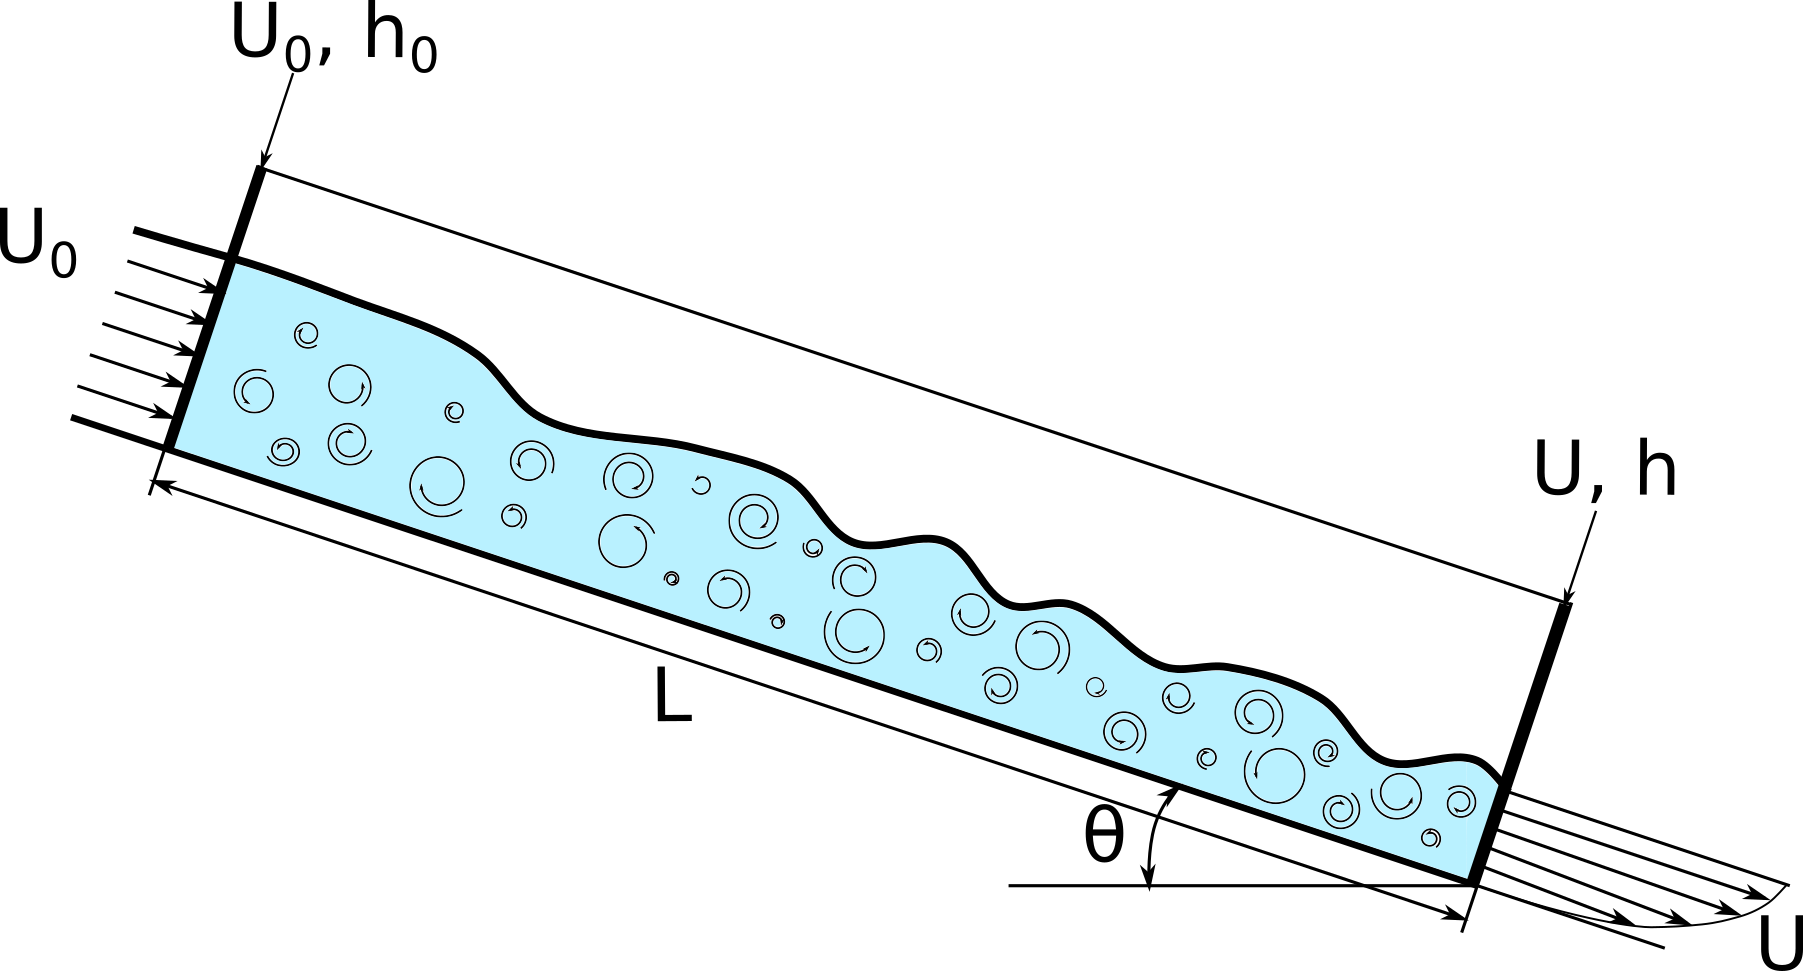
</div>

In the considered flow
\begin{equation}
    U_0 = 0.4\ \text{m}/\text{s},\ \ \ h_0 = 0.01\ \text{m},\ \ \ \theta = 25^\circ,\ \ \ L = 0.1\ \text{m}.
\end{equation}

Reynolds number of flow is 
\begin{equation}
    \text{Re} = U_0 h_0 / \nu_{eff},
\end{equation}

\begin{equation}
    \nu_{eff} = \frac{\tau_* + K (U_0/h_0)^n}{\rho (U_0 / h_0)}.
\end{equation}

Constants in calculation are set as follows:

\begin{equation}
    \nu_* = 10^7\ \text{m}^2/\text{s},\ \ \ \tau_* = 2 \cdot 10^{-3}\ \text{m}^2/\text{s}^2,\ \ \ K = 10^{-4}\ \text{m}^2/\text{s},\ \ \ n = 0.8,\ \ \ \rho = 100\ \text{kg}/\text{m}^3.
\end{equation}

So effective viscosity and Reynolds number are:

\begin{equation}
    \nu_{eff} = 10^{-6}\ \text{m}^2/\text{s},\ \ \ \text{Re} = 4000.
\end{equation}

The mesh cell linear size must be $dx = \frac{h_0}{\text{Re}^{3/4}} = 2 \cdot 10^{-5}$. Time step $dt = 5 \cdot 10^{-5}$.

Mesh size for computational domain size of 0.1x0.011x0.002 m$^3$ is $27.5 \cdot 10^7$.

[1] S. B. Pope. A more general effective-viscosity hypothesis.Journal of Fluid Mechanics,72(2):331–340, 1975.

## Current research

Above was global formulation for TBNN (Tensor Based Neural Network) with implemengtation into mathematical model. Now let's try to realize ML-turbulence model as a correction step for variables $\bar{\boldsymbol{u}}$, $\bar{\alpha}$, $\bar{p}$.

Will use tensors $\boldsymbol{T}^{(i)}$, invariants $\lambda_i$ and variables $\bar{\boldsymbol{u}}$, $\bar{p}$, $\bar{\alpha}$ as a features of NN (Neural Network). As a targets will be the differenses between DNS and RANS values for $\boldsymbol{u}$, $\alpha$ and $p$.

Let's start with importing libraries.

In [1]:
!python3 --version

Python 3.9.7


In [2]:
#!pip install git+https://github.com/tensorflow/docs
#!pip install -q -U keras-tuner
#!pip install pydot
#!pip install pydotplus
#!pip install graphviz
#!pip install pyyaml h5py

In [3]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import regularizers
from tensorflow.keras.layers.experimental import preprocessing
import tensorflow_docs as tfdocs
import tensorflow_docs.modeling
import tensorflow_docs.plots
import keras_tuner as kt
import subprocess as sp
import fileinput as fi
from keras.utils.vis_utils import plot_model
from keras.callbacks import ModelCheckpoint
import pickle
#from IPython.display import set_matplotlib_formats
#set_matplotlib_formats('svg')
import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

print(tf.__version__)

2022-11-13 15:43:25.440729: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-11-13 15:43:25.746681: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2022-11-13 15:43:25.829107: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-11-13 15:43:25.829144: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if yo

2.10.0


In [4]:
os.environ['CUDA_VISIBLE_DEVICES'] = '-1'

In [5]:
a = np.empty(0)
a = np.append(a, 1.0)
a = np.append(a, 2.0)
a.max()

2.0

In [6]:
# Copyright 2015 The TensorFlow Authors. All Rights Reserved.
#
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
#     http://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.
# ==============================================================================
"""Visualization tools for tensorflow_docs.

Use this module for plotting and visualization code that is too long to inline
into a notebook.
"""
import matplotlib.pyplot as plt
import numpy as np

prop_cycle = plt.rcParams['axes.prop_cycle']
#COLOR_CYCLE = prop_cycle.by_key()['color']
COLOR_CYCLE=['#1f77b4', '#aec7e8', '#ff7f0e', '#ffbb78', '#2ca02c', '#98df8a',
             '#d62728', '#ff9896', '#9467bd', '#c5b0d5', '#8c564b', '#c49c94',
             '#e377c2', '#f7b6d2', '#7f7f7f', '#c7c7c7', '#bcbd22', '#dbdb8d',
             '#17becf', '#9edae5']

def _smooth(values, std):
    """Smooths a list of values by convolving with a Gaussian distribution.

    Assumes equal spacing.

    Args:
        values: A 1D array of values to smooth.
        std: The standard deviation of the Gaussian distribution. The units are
            array elements.

    Returns:
        The smoothed array.
    """
    width = std * 4
    x = np.linspace(-width, width, min(2 * width + 1, len(values)))
    kernel = np.exp(-(x / 5)**2)

    values = np.array(values)
    weights = np.ones_like(values)

    smoothed_values = np.convolve(values, kernel, mode='same')
    smoothed_weights = np.convolve(weights, kernel, mode='same')

    return smoothed_values / smoothed_weights


class HistoryPlotter(object):
    """A class for plotting a named set of Keras-histories.

    The class maintains colors for each key from plot to plot.
    """

    def __init__(self, metric=None, smoothing_std=None):
        self.color_table = {}
        self.metric = metric
        self.smoothing_std = smoothing_std

    def plot(self, histories, metric=None, smoothing_std=None, yMin=0, yMax=0):
        """Plots a {name: history} dictionary of Keras histories.

        Colors are assigned to the name-key, and maintained from call to call.
        Training metrics are shown as a solid line, validation metrics dashed.

        Args:
            histories: {name: history} a dictionary of Keras histories.
            metric: which metric to plot from all the histories.
            smoothing_std: the standard deviation of the smoothing kernel applied
                before plotting. The units are in array-indices.
        """
        if metric is None:
            metric = self.metric
        if smoothing_std is None:
            smoothing_std = self.smoothing_std

        yAv = np.empty(0)
        yL = np.empty(0)
        
        for name, history in histories.items():
            # Remember name->color associations.
            if name in self.color_table:
                color = self.color_table[name]
            else:
                color = COLOR_CYCLE[len(self.color_table) % len(COLOR_CYCLE)]
                self.color_table[name] = color

            train_value = history.history[metric]
            if smoothing_std is not None:
                train_value = _smooth(train_value, std=smoothing_std)

            plt.plot(
                history.epoch,
                train_value,
                color=color,
                label=name.title())
            
            yAv = np.append(yAv, np.average(train_value))
            yL = np.append(yL, np.asarray(train_value).min())
        
        yAv = yAv[np.isfinite(yAv)]
        yL = yL[np.isfinite(yL)]
        if yMin == 0:
            yLimL = yL.min()
        else:
            yLimL = yMin
        if yMax == 0:
            yLimH = yAv.max()
        else:
            yLimH = yMax

        plt.xlabel('Epochs')
        plt.ylabel(metric.replace('_', ' ').title())
        #plt.legend()
        #fig.tight_layout()
        #plt.subplots_adjust(top = 0.85)
        plt.legend(bbox_to_anchor=(1.0, 1.0))
        #fig.savefig('pics/v_p_rho.png', dpi=300)

        plt.ylim([yLimL,yLimH])
        plt.xlim(
            [0, max([history.epoch[-1] for name, history in histories.items()])])
        plt.grid(True)

# Functions definitions

In [7]:
def timeStepsList():
    timeStepsList = np.loadtxt("timeStepsList.txt", dtype=str)
    index = np.argsort(timeStepsList.astype('float32'))
    timeStepsList = timeStepsList[index]
    #return list(timeStepsList[1:-2])
    return list(timeStepsList[1:7])

In [8]:
def readTensor(fileName, folder, time, sz):
    arr = pd.read_csv(folder+time+'/'+fileName[0],
                      header=None,
                      skiprows=23, 
                      nrows=sz, 
                      dtype=str)
    arr.iloc[:,0] = arr.iloc[:,0].str.replace('[(,)]', '', regex=True)
    arr = arr.iloc[:,0].str.split(expand=True)
    arr.columns = [fileName[0]+'0', fileName[0]+'1', fileName[0]+'2', 
                   fileName[0]+'3', fileName[0]+'4', fileName[0]+'5', 
                   fileName[0]+'6', fileName[0]+'7', fileName[0]+'8']
    arr = arr.astype('float32')
    return arr

In [9]:
def readSymmTensor(fileName, folder, time, sz):
    arr = pd.read_csv(folder+time+'/'+fileName[0], 
                      header=None, 
                      skiprows=23, 
                      nrows=sz, 
                      dtype=str)
    arr.iloc[:,0] = arr.iloc[:,0].str.replace('[(,)]', '', regex=True)
    arr = arr.iloc[:,0].str.split(expand=True)
    arr.columns = [fileName[0]+'0', fileName[0]+'1', fileName[0]+'2',
                   fileName[0]+'3', fileName[0]+'4', fileName[0]+'5', 
                   fileName[0]+'6', fileName[0]+'7', fileName[0]+'8']
    arr = arr.astype('float32')
    return arr[[fileName[0]+'0', fileName[0]+'1', fileName[0]+'2', fileName[0]+'4',\
                   fileName[0]+'5', fileName[0]+'8']]

In [10]:
def readSkewSymmTensor(fileName, folder, time, sz):
    arr = pd.read_csv(folder+time+'/'+fileName[0], 
                      header=None, 
                      skiprows=23, 
                      nrows=sz, 
                      dtype=str)
    arr.iloc[:,0] = arr.iloc[:,0].str.replace('[(,)]', '', regex=True)
    arr = arr.iloc[:,0].str.split(expand=True)
    arr.columns = [fileName[0]+'0', fileName[0]+'1', fileName[0]+'2', 
                   fileName[0]+'3', fileName[0]+'4', fileName[0]+'5', 
                   fileName[0]+'6', fileName[0]+'7', fileName[0]+'8']
    arr = arr.astype('float32')
    return arr[[fileName[0]+'1', fileName[0]+'2', fileName[0]+'5']]

In [11]:
def readVector(fileName, folder, time, sz):
    arr = pd.read_csv(folder+time+'/'+fileName[0], 
                      header=None, 
                      skiprows=23, 
                      nrows=sz, 
                      dtype=str)
    arr.iloc[:,0] = arr.iloc[:,0].str.replace('[(,)]', '', regex=True)
    arr = arr.iloc[:,0].str.split(expand=True)
    arr.columns = [fileName[0]+'0', fileName[0]+'1', fileName[0]+'2']
    arr = arr.astype('float32')
    return arr

In [12]:
def readScalar(fileName, folder, time, sz):
    arr = pd.read_csv(folder+time+'/'+fileName[0], 
                      header=None, 
                      skiprows=23, 
                      nrows=sz, 
                      dtype=str)
    arr.columns = [fileName[0]]
    arr = arr.astype('float32')
    return arr

In [13]:
def prepareTarget(data):
    data['dU0'] = data['ref/U0'] - data['res/U0']
    data['dU1'] = data['ref/U1'] - data['res/U1']
    data['dU2'] = data['ref/U2'] - data['res/U2']
    data['dAW'] = data['ref/alpha.water'] - data['res/alpha.water']
    data['dp'] = data['ref/p_rgh'] - data['res/p_rgh']

In [14]:
def prepareInit(fullData):
    data = fullData[['dU0', 'dU1', 'dU2', 'dAW', 'dp']].copy()
    data['dU0'] = fullData['dU0']# / fullData['res/Uref0']
    data['dU1'] = fullData['dU1']# / fullData['res/Uref1']
    data['dU2'] = fullData['dU2']# / fullData['res/Uref2']
    data['dAW'] = fullData['dAW']# / fullData['res/AWref']
    data['dp'] = fullData['dp']# / fullData['res/p_rghref']
    return data

In [15]:
def preparePrediction(dataPredicted, fullData):
    data = dataPredicted.copy()
    data['dU0'] = (fullData['dU0'] - dataPredicted['dU0']) / fullData['ref/U0']
    data['dU1'] = (fullData['dU1'] - dataPredicted['dU1']) / fullData['ref/U1']
    data['dU2'] = (fullData['dU2'] - dataPredicted['dU2']) / fullData['ref/U2']
    data['dAW'] = (fullData['dAW'] - dataPredicted['dAW']) / fullData['ref/alpha.water']
    data['dp'] = (fullData['dp'] - dataPredicted['dp']) / fullData['ref/p_rgh']
    return data

In [16]:
def formDataset(TSL, TSLlen, folder, FsScalars, FsVectors, FsTensors, FsSymmTensors, \
                FsSkewSymmTensors, size):
    data = pd.DataFrame()
    for time in TSL:
        #if TSLlen == 1:
        #    time = TSL
        kwargs = {'folder':folder, 'time':time, 'sz':size}
        scalars = FsScalars.apply(readScalar, axis=1, **kwargs)
        vectors = FsVectors.apply(readVector, axis=1, **kwargs)
        tensors = FsTensors.apply(readTensor, axis=1, **kwargs)
        symmTensors = FsSymmTensors.apply(readSymmTensor, axis=1, **kwargs)
        skewSymmTensors = FsSkewSymmTensors.apply(readSkewSymmTensor, axis=1, **kwargs)
        tmp = pd.concat(\
                        list(scalars[:])+\
                        list(vectors[:])+\
                        list(tensors[:])+\
                        list(symmTensors[:])+\
                        list(skewSymmTensors[:]), axis=1)
        #data = data.append(tmp, ignore_index=True)
        data = pd.concat([data, tmp], ignore_index=True)
        prepareTarget(data)
        if TSLlen == 1:
            break
    return data

In [17]:
def writePrediction(arr, arrType, time, folder, fileName):
    sp.run('cp '+folder+time+'/patterns/'+fileName+'PatternBeginning '+folder+time+'/'+ \
           time+'/'+fileName, shell=True, check=True)
    with open(folder+time+'/'+time+'/'+fileName, 'a') as f:
        f.write(str(len(arr))+'\n(\n')
    with fi.FileInput(folder+time+'/'+time+'/'+fileName, inplace=True) as file:
        for line in file:
            print(line.replace('folderName', '"'+time+'"'), end='')
    with fi.FileInput(folder+time+'/'+time+'/'+fileName, inplace=True) as file:
        for line in file:
            print(line.replace('fieldName', fileName), end='')
    if arrType == 'vector':
        arr = arr.astype(str)
        arr = '( '+arr.iloc[:,0]+' '+arr.iloc[:,1]+' '+arr.iloc[:,2]+' )'
    elif arrType == 'scalar':
        arr = arr.astype(str)
    arr.to_csv(folder+time+'/'+time+'/'+fileName, mode='a', index=False, header=False)
    with open(folder+time+'/'+time+'/'+fileName, 'a') as\
        fout, fi.input(folder+time+'/'+'patterns/'+fileName+'PatternEnding') as fin:
            for line in fin:
                fout.write(line)

Below all features listed. alpha.water is $\bar{\alpha}$, 'alpha.water', 'U' and 'p_rgh' are initial values. Parameters from res/ folder are calculated without turbulence model using base interFoam solver. 'Uref', 'AWref' and 'p_rghref' are reference values calculated using DNS data.

# Data Preparation

In [18]:
MLturbRANSfolder = 'TIF'
KEturbRANSfolder = 'KEIF'
KWturbRANSfolder = 'KWIF'
deltaT = 1e-05
size = 37500#300000
FsScalarsLabels = [\
    ['init/alpha.water'], ['res/alpha.water'], ['ref/alpha.water'], ['init/p_rgh'], ['res/p_rgh'],\
    ['ref/p_rgh'], ['res/I0'], ['res/I1'], ['res/I2'], ['res/I3'], ['res/I4'],\
    ['res/magGradP'], ['res/magGradAW'], ['res/inv1GradU'], ['res/inv2GradU']\
    ]
FsScalars = pd.DataFrame(FsScalarsLabels)
FsVectorLabels = [['init/U'], ['res/U'], ['ref/U'], ['res/gradP'], ['res/gradAW']]
FsVectors = pd.DataFrame(FsVectorLabels)
FsTensorLabels = [['res/gradU']]
FsTensors = pd.DataFrame(FsTensorLabels)
FsSymmTensorsLabels = [\
    ['res/T0'], ['res/T1'], ['res/T2'], ['res/T3'], ['res/T4'], ['res/T5'], \
    ['res/T6'], ['res/T7'], ['res/T8'], ['res/T9']\
    ]
FsSymmTensors = pd.DataFrame(FsSymmTensorsLabels)
FsSkewSymmTensorsLabels = [['res/rotationRateTensor']]
FsSkewSymmTensors = pd.DataFrame(FsSkewSymmTensorsLabels)

In [19]:
FsScalarsTestLabels = [\
    ['init/alpha.water'], ['res/alpha.water'], ['ref/alpha.water'], ['init/p_rgh'], ['res/p_rgh'],\
    ['ref/p_rgh']]
FsScalarsTest = pd.DataFrame(FsScalarsTestLabels)
FsVectorTestLabels = [['res/U'], ['ref/U']]
FsVectorsTest = pd.DataFrame(FsVectorTestLabels)
FsTensorTestLabels = []
FsTensorsTest = pd.DataFrame(FsTensorTestLabels)
FsSymmTensorsTestLabels = []
FsSymmTensorsTest = pd.DataFrame(FsSymmTensorsTestLabels)
FsSkewSymmTensorsTestLabels = []
FsSkewSymmTensorsTest = pd.DataFrame(FsSkewSymmTensorsTestLabels)

In [20]:
target_labels = ['dU0', 'dU1', 'dU2', 'dAW', 'dp']
tensor_labels = [\
    'res/T00', 'res/T01', 'res/T02', 'res/T04', 'res/T05', 'res/T08',\
    'res/T10', 'res/T11', 'res/T12', 'res/T14', 'res/T15', 'res/T18',\
    'res/T20', 'res/T21', 'res/T22', 'res/T24', 'res/T25', 'res/T28',\
    'res/T30', 'res/T31', 'res/T32', 'res/T34', 'res/T35', 'res/T38',\
    'res/T40', 'res/T41', 'res/T42', 'res/T44', 'res/T45', 'res/T48',\
    'res/T50', 'res/T51', 'res/T52', 'res/T54', 'res/T55', 'res/T58',\
    'res/T60', 'res/T61', 'res/T62', 'res/T64', 'res/T65', 'res/T68',\
    'res/T70', 'res/T71', 'res/T72', 'res/T74', 'res/T75', 'res/T78',\
    'res/T80', 'res/T81', 'res/T82', 'res/T84', 'res/T85', 'res/T88',\
    'res/T90', 'res/T91', 'res/T92', 'res/T94', 'res/T95', 'res/T98',\
    'res/rotationRateTensor1', 'res/rotationRateTensor2', 'res/rotationRateTensor5',
    'res/gradU0', 'res/gradU1', 'res/gradU2', 'res/gradU3', 'res/gradU4',\
    'res/gradU5', 'res/gradU6', 'res/gradU7', 'res/gradU8']
grad_labels = [\
    'res/gradP0', 'res/gradP1', 'res/gradP2', 'res/gradAW0', 'res/gradAW1', 'res/gradAW2',\
    'res/gradU0', 'res/gradU1', 'res/gradU2', 'res/gradU3', 'res/gradU4', 'res/gradU5',\
    'res/gradU6', 'res/gradU7', 'res/gradU8']
vector_labels = ['init/U0', 'init/U1', 'init/U2', 'res/U0', 'res/U1', 'res/U2']
param_labels = ['init/alpha.water', 'init/p_rgh', 'res/p_rgh', 'res/alpha.water']
invar_labels = ['res/I0', 'res/I1', 'res/I2', 'res/I3', 'res/I4',\
    'res/magGradP', 'res/magGradAW', 'res/inv1GradU', 'res/inv2GradU']
long_input_labels = invar_labels
short_input_labels = tensor_labels + grad_labels + vector_labels +\
                    param_labels
features_labels = long_input_labels + short_input_labels

In [21]:
# def load_data(time, MLturbRANSfolder, FsScalars, FsVectors, FsTensors, 
#                         FsSymmTensors, FsSkewSymmTensors, size, 
#                           short_input_labels, long_input_labels, target_labels):
#     trainData = formDataset([time], 1, MLturbRANSfolder, FsScalars, FsVectors, FsTensors, 
#                         FsSymmTensors, FsSkewSymmTensors, size)
#     print('data was loaded\n')
#     trainData.sample(frac=1)
#     train_target = trainData.loc[:, target_labels]
#     train_features_short = trainData.loc[:, short_input_labels]
#     train_features_long = trainData.loc[:, long_input_labels]
#     return ([train_features_long, train_features_short], train_target)

In [22]:
# def batch_generator(mode, MLturbRANSfolder, FsScalars, FsVectors, FsTensors, 
#                         FsSymmTensors, FsSkewSymmTensors, size, 
#                        short_input_labels, long_input_labels, target_labels):
#     TSL = timeStepsList()
#     print("TSL\n")
#     print(TSL)
#     print("\n")
#     print("mode: ", mode, "\n")
#     if (mode == 'train'):
#         TSL = TSL[:2]
#     #elif (mode == 'validation'):
#     #    TSL = TSL[5]
#     elif (mode == 'test'):
#         TSL = TSL[-2:]
#     print(TSL, "\n")
    
#     idx = -1
#     while True: 
#         if idx < len(TSL):
#             idx += 1
#         else:
#             idx = 0
#         yield load_data(TSL[idx], MLturbRANSfolder, FsScalars, FsVectors, FsTensors,  
#                         FsSymmTensors, FsSkewSymmTensors, size, 
#                         short_input_labels, long_input_labels, target_labels)
#         print(idx)
    

In [23]:
#train_batch_generator = batch_generator('train', MLturbRANSfolder, FsScalars, FsVectors, FsTensors, 
#                        FsSymmTensors, FsSkewSymmTensors, size, 
#                       short_input_labels, long_input_labels, target_labels)
#validation_batch_generator = batch_generator('validation', MLturbRANSfolder, FsScalars, FsVectors, FsTensors, 
#                        FsSymmTensors, FsSkewSymmTensors, size, 
#                       short_input_labels, long_input_labels, target_labels)

In [24]:
TSL = np.asarray(timeStepsList())
TSLlen = len(TSL)
train_ind = np.concatenate([np.arange(0, 3, dtype=int), np.arange(4, TSLlen-1,  dtype=int)])
testCenterData_ind = np.asarray([3])
testLastData_ind = np.asarray([TSLlen-1])
#TSL

In [25]:
%%time
trainData = formDataset(TSL[train_ind], len(TSL[train_ind]), MLturbRANSfolder, FsScalars, FsVectors, FsTensors, 
                        FsSymmTensors, FsSkewSymmTensors, size)
#valData = formDataset([TSL[5]], 1, MLturbRANSfolder, FsScalars, FsVectors, FsTensors, 
#                        FsSymmTensors, FsSkewSymmTensors, size)
#testData = formDataset(testTSL, len(testTSL), MLturbRANSfolder, FsScalars, FsVectors, 
#                       FsTensors, FsSymmTensors, FsSkewSymmTensors, size)
testCenterData = formDataset(TSL[testCenterData_ind], 1, MLturbRANSfolder, FsScalarsTest, FsVectorsTest,
                             FsTensorsTest, FsSymmTensorsTest, FsSkewSymmTensorsTest, size)
testLastData = formDataset(TSL[testLastData_ind], 1, MLturbRANSfolder, FsScalarsTest, FsVectorsTest,
                           FsTensorsTest, FsSymmTensorsTest, FsSkewSymmTensorsTest, size)

#testKEData = formDataset(testTSL, len(testTSL), KEturbRANSfolder, ResFsScalars, ResFsVectors,
#                         ResFsTensors, ResFsSymmTensors, ResFsSkewSymmTensors, size)
testKECenterData = formDataset(TSL[testCenterData_ind], 1, MLturbRANSfolder, FsScalarsTest, FsVectorsTest,
                               FsTensorsTest, FsSymmTensorsTest, FsSkewSymmTensorsTest, size)
testKELastData = formDataset(TSL[testLastData_ind], 1, MLturbRANSfolder, FsScalarsTest, FsVectorsTest,
                             FsTensorsTest, FsSymmTensorsTest, FsSkewSymmTensorsTest, size)

#testKWData = formDataset(testTSL, len(testTSL), KWturbRANSfolder, ResFsScalars, ResFsVectors,
#                         ResFsTensors, ResFsSymmTensors, ResFsSkewSymmTensors, size)
testKWCenterData = formDataset(TSL[testCenterData_ind], 1, MLturbRANSfolder, FsScalarsTest, FsVectorsTest,
                               FsTensorsTest, FsSymmTensorsTest, FsSkewSymmTensorsTest, size)
testKWLastData = formDataset(TSL[testLastData_ind], 1, MLturbRANSfolder, FsScalarsTest, FsVectorsTest,
                             FsTensorsTest, FsSymmTensorsTest, FsSkewSymmTensorsTest, size)

CPU times: user 13.7 s, sys: 548 ms, total: 14.2 s
Wall time: 14.5 s


In [26]:
trainData.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
init/alpha.water,150000.0,3.339814e-01,0.467691,-7.999938e-09,7.687532e-34,5.704928e-10,1.000000,1.000001
res/alpha.water,150000.0,3.340204e-01,0.467671,-3.575929e-28,2.042943e-32,6.133118e-10,1.000000,1.000000
ref/alpha.water,150000.0,3.339814e-01,0.467691,-7.999938e-09,7.687532e-34,5.704928e-10,1.000000,1.000001
init/p_rgh,150000.0,-2.028101e+01,66.111633,-3.628040e+02,-2.283010e-01,5.770228e-04,0.023684,85.767517
res/p_rgh,150000.0,-2.632509e+01,85.860275,-1.049436e+03,-8.408502e+00,-2.570473e-02,0.016261,613.136536
...,...,...,...,...,...,...,...,...
dU0,150000.0,-1.623830e-04,0.004841,-4.131871e-01,-1.624823e-04,-9.298325e-06,0.000094,0.051517
dU1,150000.0,-6.552331e-07,0.001708,-7.560493e-02,-6.500954e-05,-3.995976e-07,0.000070,0.056412
dU2,150000.0,1.705530e-05,0.003400,-5.742306e-02,-1.246966e-04,2.437085e-05,0.000189,0.201294
dAW,150000.0,-3.333305e-05,0.000966,-2.780432e-02,-1.851791e-34,0.000000e+00,0.000000,0.023367


In [27]:
train_target = trainData.loc[:, target_labels]
train_features_short = trainData.loc[:, short_input_labels]
train_features_long = trainData.loc[:, long_input_labels]
train_features = trainData.loc[:, features_labels]

#test_target = testData.loc[:, target_labels]
#test_features_short = testData.loc[:, short_input_labels]
#test_features_long = testData.loc[:, long_input_labels]
#test_features = testData.loc[:, features_labels]

# Preparation for training

In [28]:
# def compile_and_fit(model, name, train_batch_generator_ = train_batch_generator,                    
#                     steps_per_epoch_ = STEPS_PER_EPOCH, k = 1, version = "",
#                     optimizer=None, max_epochs=1000, callbacks=None):
    
#     saved_models_dir = "/home/nargiza/repo_2/tbnnTurbulenceTraining/" + \
#     "constantAngleSlopeDNS_U4e-1_A5_H1e-2_RANSsets/saved_model"
#     #weights_file = os.path.join(saved_models_dir, name + "_" + version + ".hdf5") 
#     model_dir = os.path.join(saved_models_dir, name + version)
#     if (not os.path.exists(model_dir)):
#         os.mkdir(model_dir)
#     filepath = os.path.join(model_dir, "{epoch:03d}-{loss:.4f}.h5")
#     checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath = filepath,
#                                  monitor='loss',
#                                  save_best_only=True,
#                                  save_weights_only = True)

#     #model.save_weights(filepath.format(epoch=0))
    
#     if optimizer is None:
#         optimizer = get_optimizer()
#     model.compile(optimizer=optimizer,
#                   loss='mean_absolute_error',
#                   metrics=[tf.keras.metrics.MeanAbsoluteError(
#                       name='mean_absolute_error')])

#     model.summary()

#     history = model.fit(
#         train_batch_generator_,
#         steps_per_epoch = steps_per_epoch_ * k,
#         epochs = max_epochs,
#         verbose = 1,
#         callbacks = [checkpoint])
#     model.save(os.path.join(model_dir, name + "_model"))
#     return history

In [29]:
# def compile_and_fitTBNN(model, name, optimizer=None, max_epochs=1000, callbacks=None, k = 1):
#     if optimizer is None:
#         optimizer = get_optimizer()
    
#     model.compile(optimizer=optimizer,
#                   loss='mean_absolute_error',
#                   metrics=[tf.keras.metrics.MeanAbsoluteError(
#                       name='mean_absolute_error')])

#     model.summary()

#     history = model.fit(
#         [train_features_long, train_features_short],
#         train_target,
#         steps_per_epoch = STEPS_PER_EPOCH * k,
#         epochs=max_epochs,
#         validation_split=0.2,
#         verbose=1,
#         callbacks=callbacks)
#     return history

In [30]:
def compile_and_fitTBNN(model, max_epochs=1000, decay_step=10, loss='mean_absolute_error'):
    
    learning_rate_fn = keras.optimizers.schedules.InverseTimeDecay(
        1.0, decay_step, 1)
    
    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate_fn),
        loss=loss,
        metrics=[tf.keras.metrics.MeanAbsoluteError(name='mean_absolute_error'),
                 tf.keras.metrics.MeanSquaredError(name='mean_squared_error')])
    
    history = model.fit(
        [train_features_long, train_features_short],
        train_target,
        epochs=max_epochs,
        # Suppress logging.
        verbose=0,
        # Calculate validation results on 1% of the training data.
        validation_split = 0.6)
    
    return history

In [31]:
def compile_and_fit(model, max_epochs=1000, decay_step=10, loss='mean_absolute_error'):
    
    learning_rate_fn = keras.optimizers.schedules.InverseTimeDecay(
        1.0, decay_step, 1)
    
    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate_fn),
        loss=loss,
        metrics=[tf.keras.metrics.MeanAbsoluteError(name='mean_absolute_error'),
                 tf.keras.metrics.MeanSquaredError(name='mean_squared_error')])
    
    history = model.fit(
        train_features,
        train_target,
        epochs=max_epochs,
        # Suppress logging.
        verbose=0,
        # Calculate validation results on 1% of the training data.
        validation_split = 0.6)
    
    return history

In [32]:
normalizer_tensors = tf.keras.layers.Normalization(axis=-1)
normalizer_tensors.adapt(train_features_short)
normalizer_no_tensors = tf.keras.layers.Normalization(axis=-1)
normalizer_no_tensors.adapt(train_features_long)
normalizer_all = tf.keras.layers.Normalization(axis=-1)
normalizer_all.adapt(train_features)
#normalizer_tensors = tf.keras.layers.Normalization(axis=-1, mean = 0, variance = 1)
#normalizer_no_tensors = tf.keras.layers.Normalization(axis=-1, mean = 0, variance = 1)

2022-11-13 15:43:52.130134: E tensorflow/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2022-11-13 15:43:52.130227: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (romanovadi-surface-pro-7): /proc/driver/nvidia/version does not exist
2022-11-13 15:43:52.131191: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


# Architecture

In [33]:
inputs_long = keras.Input(shape=(len(train_features_long.columns),))
inputs_short = keras.Input(shape=(len(train_features_short.columns),))
norm_long = normalizer_no_tensors(inputs_long)
norm_short = normalizer_tensors(inputs_short)
denseLayer1 = layers.Dense(64,
                           activation='linear',
                           kernel_initializer=tf.keras.initializers.Ones(),
                           bias_initializer=tf.keras.initializers.Ones())(norm_long)
denseLayer2 = layers.Dense(len(train_features_short.columns),
                           activation='linear',
                           kernel_initializer=tf.keras.initializers.Ones(),
                           bias_initializer=tf.keras.initializers.Ones())(denseLayer1)
concatenate = layers.Concatenate()([denseLayer2, norm_short])
outputs = layers.Dense(len(train_target.columns),
                       activation='linear',
                       kernel_initializer=tf.keras.initializers.Ones(),
                       bias_initializer=tf.keras.initializers.Ones())(concatenate)

TBNNModel2Concat = keras.Model(
    inputs=[inputs_long, inputs_short],
    outputs=outputs,
)

In [34]:
inputs_long = keras.Input(shape=(len(train_features_long.columns),))
inputs_short = keras.Input(shape=(len(train_features_short.columns),))
norm_long = normalizer_no_tensors(inputs_long)
norm_short = normalizer_tensors(inputs_short)
denseLayer1 = layers.Dense(64,
                           activation='linear',
                           kernel_initializer=tf.keras.initializers.Ones(),
                           bias_initializer=tf.keras.initializers.Ones())(norm_long)
denseLayer2 = layers.Dense(len(train_features_short.columns),
                           activation='linear',
                           kernel_initializer=tf.keras.initializers.Ones(),
                           bias_initializer=tf.keras.initializers.Ones())(denseLayer1)
multiply = layers.Multiply()([denseLayer2, norm_short])
outputs = layers.Dense(len(train_target.columns),
                       activation='linear',
                       kernel_initializer=tf.keras.initializers.Ones(),
                       bias_initializer=tf.keras.initializers.Ones())(multiply)

TBNNModel2 = keras.Model(
    inputs=[inputs_long, inputs_short],
    outputs=outputs,
)

In [35]:
full_dnn_model_2_linear = keras.Sequential([
    normalizer_all,
    layers.Dense(64,
                 activation='linear',
                 kernel_initializer=tf.keras.initializers.Ones(),
                 bias_initializer=tf.keras.initializers.Ones()),
    layers.Dense(64,
                 activation='linear',
                 kernel_initializer=tf.keras.initializers.Ones(),
                 bias_initializer=tf.keras.initializers.Ones()),
    layers.Dense(len(train_target.columns),
                 activation='linear',
                 kernel_initializer=tf.keras.initializers.Ones(),
                 bias_initializer=tf.keras.initializers.Ones())
])

In [36]:
full_dnn_model_2_sigmoid = keras.Sequential([
    normalizer_all,
    layers.Dense(64,
                 activation='sigmoid',
                 kernel_initializer=tf.keras.initializers.Ones(),
                 bias_initializer=tf.keras.initializers.Ones()),
    layers.Dense(64,
                 activation='sigmoid',
                 kernel_initializer=tf.keras.initializers.Ones(),
                 bias_initializer=tf.keras.initializers.Ones()),
    layers.Dense(len(train_target.columns),
                 activation='sigmoid',
                 kernel_initializer=tf.keras.initializers.Ones(),
                 bias_initializer=tf.keras.initializers.Ones())
])

In [37]:
full_dnn_model_2_relu = keras.Sequential([
    normalizer_all,
    layers.Dense(64,
                 activation='relu',
                 kernel_initializer=tf.keras.initializers.Ones(),
                 bias_initializer=tf.keras.initializers.Ones()),
    layers.Dense(64,
                 activation='relu',
                 kernel_initializer=tf.keras.initializers.Ones(),
                 bias_initializer=tf.keras.initializers.Ones()),
    layers.Dense(len(train_target.columns),
                 activation='relu',
                 kernel_initializer=tf.keras.initializers.Ones(),
                 bias_initializer=tf.keras.initializers.Ones())
])

In [38]:
full_dnn_model_2_exponential = keras.Sequential([
    normalizer_all,
    layers.Dense(64,
                 activation='exponential',
                 kernel_initializer=tf.keras.initializers.Ones(),
                 bias_initializer=tf.keras.initializers.Ones()),
    layers.Dense(64,
                 activation='exponential',
                 kernel_initializer=tf.keras.initializers.Ones(),
                 bias_initializer=tf.keras.initializers.Ones()),
    layers.Dense(len(train_target.columns),
                 activation='exponential',
                 kernel_initializer=tf.keras.initializers.Ones(),
                 bias_initializer=tf.keras.initializers.Ones())
])

In [39]:
full_dnn_model_2_elu = keras.Sequential([
    normalizer_all,
    layers.Dense(64,
                 activation='elu',
                 kernel_initializer=tf.keras.initializers.Ones(),
                 bias_initializer=tf.keras.initializers.Ones()),
    layers.Dense(64,
                 activation='elu',
                 kernel_initializer=tf.keras.initializers.Ones(),
                 bias_initializer=tf.keras.initializers.Ones()),
    layers.Dense(len(train_target.columns),
                 activation='elu',
                 kernel_initializer=tf.keras.initializers.Ones(),
                 bias_initializer=tf.keras.initializers.Ones())
])

In [40]:
full_dnn_model_2_gelu = keras.Sequential([
    normalizer_all,
    layers.Dense(64,
                 activation='gelu',
                 kernel_initializer=tf.keras.initializers.Ones(),
                 bias_initializer=tf.keras.initializers.Ones()),
    layers.Dense(64,
                 activation='gelu',
                 kernel_initializer=tf.keras.initializers.Ones(),
                 bias_initializer=tf.keras.initializers.Ones()),
    layers.Dense(len(train_target.columns),
                 activation='gelu',
                 kernel_initializer=tf.keras.initializers.Ones(),
                 bias_initializer=tf.keras.initializers.Ones())
])

In [41]:
full_dnn_model_2_hard_sigmoid = keras.Sequential([
    normalizer_all,
    layers.Dense(64,
                 activation='hard_sigmoid',
                 kernel_initializer=tf.keras.initializers.Ones(),
                 bias_initializer=tf.keras.initializers.Ones()),
    layers.Dense(64,
                 activation='hard_sigmoid',
                 kernel_initializer=tf.keras.initializers.Ones(),
                 bias_initializer=tf.keras.initializers.Ones()),
    layers.Dense(len(train_target.columns),
                 activation='hard_sigmoid',
                 kernel_initializer=tf.keras.initializers.Ones(),
                 bias_initializer=tf.keras.initializers.Ones())
])

In [42]:
full_dnn_model_2_selu = keras.Sequential([
    normalizer_all,
    layers.Dense(64,
                 activation='selu',
                 kernel_initializer=tf.keras.initializers.Ones(),
                 bias_initializer=tf.keras.initializers.Ones()),
    layers.Dense(64,
                 activation='selu',
                 kernel_initializer=tf.keras.initializers.Ones(),
                 bias_initializer=tf.keras.initializers.Ones()),
    layers.Dense(len(train_target.columns),
                 activation='selu',
                 kernel_initializer=tf.keras.initializers.Ones(),
                 bias_initializer=tf.keras.initializers.Ones())
])

In [43]:
full_dnn_model_2_softmax = keras.Sequential([
    normalizer_all,
    layers.Dense(64,
                 activation='softmax',
                 kernel_initializer=tf.keras.initializers.Ones(),
                 bias_initializer=tf.keras.initializers.Ones()),
    layers.Dense(64,
                 activation='softmax',
                 kernel_initializer=tf.keras.initializers.Ones(),
                 bias_initializer=tf.keras.initializers.Ones()),
    layers.Dense(len(train_target.columns),
                 activation='softmax',
                 kernel_initializer=tf.keras.initializers.Ones(),
                 bias_initializer=tf.keras.initializers.Ones())
])

In [44]:
full_dnn_model_2_softplus = keras.Sequential([
    normalizer_all,
    layers.Dense(64,
                 activation='softplus',
                 kernel_initializer=tf.keras.initializers.Ones(),
                 bias_initializer=tf.keras.initializers.Ones()),
    layers.Dense(64,
                 activation='softplus',
                 kernel_initializer=tf.keras.initializers.Ones(),
                 bias_initializer=tf.keras.initializers.Ones()),
    layers.Dense(len(train_target.columns),
                 activation='softplus',
                 kernel_initializer=tf.keras.initializers.Ones(),
                 bias_initializer=tf.keras.initializers.Ones())
])

In [45]:
full_dnn_model_2_softsign = keras.Sequential([
    normalizer_all,
    layers.Dense(64,
                 activation='softsign',
                 kernel_initializer=tf.keras.initializers.Ones(),
                 bias_initializer=tf.keras.initializers.Ones()),
    layers.Dense(64,
                 activation='softsign',
                 kernel_initializer=tf.keras.initializers.Ones(),
                 bias_initializer=tf.keras.initializers.Ones()),
    layers.Dense(len(train_target.columns),
                 activation='softsign',
                 kernel_initializer=tf.keras.initializers.Ones(),
                 bias_initializer=tf.keras.initializers.Ones())
])

In [46]:
full_dnn_model_2_swish = keras.Sequential([
    normalizer_all,
    layers.Dense(64,
                 activation='swish',
                 kernel_initializer=tf.keras.initializers.Ones(),
                 bias_initializer=tf.keras.initializers.Ones()),
    layers.Dense(64,
                 activation='swish',
                 kernel_initializer=tf.keras.initializers.Ones(),
                 bias_initializer=tf.keras.initializers.Ones()),
    layers.Dense(len(train_target.columns),
                 activation='swish',
                 kernel_initializer=tf.keras.initializers.Ones(),
                 bias_initializer=tf.keras.initializers.Ones())
])

In [47]:
full_dnn_model_2_tanh = keras.Sequential([
    normalizer_all,
    layers.Dense(64,
                 activation='tanh',
                 kernel_initializer=tf.keras.initializers.Ones(),
                 bias_initializer=tf.keras.initializers.Ones()),
    layers.Dense(64,
                 activation='tanh',
                 kernel_initializer=tf.keras.initializers.Ones(),
                 bias_initializer=tf.keras.initializers.Ones()),
    layers.Dense(len(train_target.columns),
                 activation='tanh',
                 kernel_initializer=tf.keras.initializers.Ones(),
                 bias_initializer=tf.keras.initializers.Ones())
])

In [48]:
inputs_long = keras.Input(shape=(len(train_features_long.columns),))
inputs_short = keras.Input(shape=(len(train_features_short.columns),))
norm_long = normalizer_no_tensors(inputs_long)
norm_short = normalizer_tensors(inputs_short)
denseLayer1 = layers.Dense(64,
                           activation='linear',
                           kernel_initializer=tf.keras.initializers.Ones(),
                           bias_initializer=tf.keras.initializers.Ones())(norm_long)
denseLayer2 = layers.Dense(64,
                           activation='linear',
                           kernel_initializer=tf.keras.initializers.Ones(),
                           bias_initializer=tf.keras.initializers.Ones())(denseLayer1)
denseLayer3 = layers.Dense(len(train_features_short.columns),
                           activation='linear',
                           kernel_initializer=tf.keras.initializers.Ones(),
                           bias_initializer=tf.keras.initializers.Ones())(denseLayer2)
multiply = layers.Multiply()([denseLayer3, norm_short])
outputs = layers.Dense(len(train_target.columns),
                       activation='linear',
                       kernel_initializer=tf.keras.initializers.Ones(),
                       bias_initializer=tf.keras.initializers.Ones())(multiply)

TBNNModel3 = keras.Model(
    inputs=[inputs_long, inputs_short],
    outputs=outputs,
)

In [49]:
inputs_long = keras.Input(shape=(len(train_features_long.columns),))
inputs_short = keras.Input(shape=(len(train_features_short.columns),))
norm_long = normalizer_no_tensors(inputs_long)
norm_short = normalizer_tensors(inputs_short)
denseLayer1 = layers.Dense(64,
                           activation='linear',
                           kernel_initializer=tf.keras.initializers.Ones(),
                           bias_initializer=tf.keras.initializers.Ones())(norm_long)
denseLayer2 = layers.Dense(64,
                           activation='linear',
                           kernel_initializer=tf.keras.initializers.Ones(),
                           bias_initializer=tf.keras.initializers.Ones())(denseLayer1)
denseLayer3 = layers.Dense(64,
                           activation='linear',
                           kernel_initializer=tf.keras.initializers.Ones(),
                           bias_initializer=tf.keras.initializers.Ones())(denseLayer2)
denseLayer4 = layers.Dense(len(train_features_short.columns),
                           activation='linear',
                           kernel_initializer=tf.keras.initializers.Ones(),
                           bias_initializer=tf.keras.initializers.Ones())(denseLayer3)
multiply = layers.Multiply()([denseLayer4, norm_short])
outputs = layers.Dense(len(train_target.columns),
                       activation='linear',
                       kernel_initializer=tf.keras.initializers.Ones(),
                       bias_initializer=tf.keras.initializers.Ones())(multiply)

TBNNModel4 = keras.Model(
    inputs=[inputs_long, inputs_short],
    outputs=outputs,
)

In [50]:
inputs_long = keras.Input(shape=(len(train_features_long.columns),))
inputs_short = keras.Input(shape=(len(train_features_short.columns),))
norm_long = normalizer_no_tensors(inputs_long)
norm_short = normalizer_tensors(inputs_short)
denseLayer1 = layers.Dense(64,
                           activation='linear',
                           kernel_initializer=tf.keras.initializers.Ones(),
                           bias_initializer=tf.keras.initializers.Ones())(norm_short)
denseLayer2 = layers.Dense(len(train_features_long.columns),
                           activation='linear',
                           kernel_initializer=tf.keras.initializers.Ones(),
                           bias_initializer=tf.keras.initializers.Ones())(denseLayer1)
multiply = layers.Multiply()([denseLayer2, norm_long])
outputs = layers.Dense(len(train_target.columns),
                       activation='linear',
                       kernel_initializer=tf.keras.initializers.Ones(),
                       bias_initializer=tf.keras.initializers.Ones())(multiply)

TBNNModel2Swaped = keras.Model(
    inputs=[inputs_long, inputs_short],
    outputs=outputs,
)

In [51]:
full_dnn_model_3 = keras.Sequential([
    normalizer_all,
    layers.Dense(64,
                 activation='linear',
                 kernel_initializer=tf.keras.initializers.Ones(),
                 bias_initializer=tf.keras.initializers.Ones()),
    layers.Dense(64,
                 activation='linear',
                 kernel_initializer=tf.keras.initializers.Ones(),
                 bias_initializer=tf.keras.initializers.Ones()),
    layers.Dense(64,
                 activation='linear',
                 kernel_initializer=tf.keras.initializers.Ones(),
                 bias_initializer=tf.keras.initializers.Ones()),
    layers.Dense(len(train_target.columns),
                 activation='linear',
                 kernel_initializer=tf.keras.initializers.Ones(),
                 bias_initializer=tf.keras.initializers.Ones())
])

In [52]:
full_dnn_model_4 = keras.Sequential([
    normalizer_all,
    layers.Dense(64,
                 activation='linear',
                 kernel_initializer=tf.keras.initializers.Ones(),
                 bias_initializer=tf.keras.initializers.Ones()),
    layers.Dense(64,
                 activation='linear',
                 kernel_initializer=tf.keras.initializers.Ones(),
                 bias_initializer=tf.keras.initializers.Ones()),
    layers.Dense(64,
                 activation='linear',
                 kernel_initializer=tf.keras.initializers.Ones(),
                 bias_initializer=tf.keras.initializers.Ones()),
    layers.Dense(64,
                 activation='linear',
                 kernel_initializer=tf.keras.initializers.Ones(),
                 bias_initializer=tf.keras.initializers.Ones()),
    layers.Dense(len(train_target.columns),
                 activation='linear',
                 kernel_initializer=tf.keras.initializers.Ones(),
                 bias_initializer=tf.keras.initializers.Ones())
])

# Model Training

## Activation functions review

In [54]:
histories_activationFunctions1 = {}

In [55]:
%%time
histories_activationFunctions1['linear'] = compile_and_fit(
    full_dnn_model_2_linear,
    max_epochs=100,
    decay_step=20,
    loss='mean_absolute_error')

CPU times: user 6min 10s, sys: 44.8 s, total: 6min 55s
Wall time: 4min 29s


In [70]:
%%time
histories_activationFunctions1['selu_LR_50'] = compile_and_fit(
    full_dnn_model_2_selu,
    max_epochs=100,
    decay_step=50,
    loss='mean_absolute_error')

CPU times: user 6min 35s, sys: 39.5 s, total: 7min 15s
Wall time: 4min 57s


In [57]:
%%time
histories_activationFunctions1['softplus'] = compile_and_fit(
    full_dnn_model_2_softplus,
    max_epochs=100,
    decay_step=20,
    loss='mean_absolute_error')

CPU times: user 6min 33s, sys: 38.1 s, total: 7min 11s
Wall time: 4min 51s


In [58]:
%%time
histories_activationFunctions1['elu'] = compile_and_fit(
    full_dnn_model_2_elu,
    max_epochs=100,
    decay_step=20,
    loss='mean_absolute_error')

CPU times: user 6min 3s, sys: 41.7 s, total: 6min 45s
Wall time: 4min 33s


In [59]:
%%time
histories_activationFunctions1['sigmoid'] = compile_and_fit(
    full_dnn_model_2_sigmoid,
    max_epochs=100,
    decay_step=20,
    loss='mean_absolute_error')

CPU times: user 6min, sys: 40.6 s, total: 6min 41s
Wall time: 4min 32s


In [60]:
%%time
histories_activationFunctions1['exponential'] = compile_and_fit(
    full_dnn_model_2_exponential,
    max_epochs=100,
    decay_step=20,
    loss='mean_absolute_error')

CPU times: user 6min 4s, sys: 41.8 s, total: 6min 45s
Wall time: 4min 34s


In [61]:
%%time
histories_activationFunctions1['relu'] = compile_and_fit(
    full_dnn_model_2_relu,
    max_epochs=100,
    decay_step=20,
    loss='mean_absolute_error')

CPU times: user 5min 59s, sys: 42.1 s, total: 6min 41s
Wall time: 4min 32s


In [62]:
%%time
histories_activationFunctions1['sigmoid'] = compile_and_fit(
    full_dnn_model_2_hard_sigmoid,
    max_epochs=100,
    decay_step=20,
    loss='mean_absolute_error')

CPU times: user 6min 29s, sys: 39.1 s, total: 7min 9s
Wall time: 4min 45s


In [63]:
%%time
histories_activationFunctions1['gelu'] = compile_and_fit(
    full_dnn_model_2_gelu,
    max_epochs=100,
    decay_step=20,
    loss='mean_absolute_error')

CPU times: user 6min 24s, sys: 39.3 s, total: 7min 3s
Wall time: 4min 47s


%%time
histories_activationFunctions1['softmax'] = compile_and_fit(
    full_dnn_model_2_softmax,
    max_epochs=100,
    decay_step=20,
    loss='mean_absolute_error')

In [64]:
%%time
histories_activationFunctions1['softsign'] = compile_and_fit(
    full_dnn_model_2_softsign,
    max_epochs=100,
    decay_step=20,
    loss='mean_absolute_error')

CPU times: user 6min 6s, sys: 39.9 s, total: 6min 46s
Wall time: 4min 35s


In [65]:
%%time
histories_activationFunctions1['swish'] = compile_and_fit(
    full_dnn_model_2_swish,
    max_epochs=100,
    decay_step=20,
    loss='mean_absolute_error')

CPU times: user 8min 32s, sys: 1min 26s, total: 9min 59s
Wall time: 6min 8s


In [66]:
%%time
histories_activationFunctions1['tanh'] = compile_and_fit(
    full_dnn_model_2_tanh,
    max_epochs=100,
    decay_step=20,
    loss='mean_absolute_error')

CPU times: user 6min 25s, sys: 40.2 s, total: 7min 5s
Wall time: 4min 37s


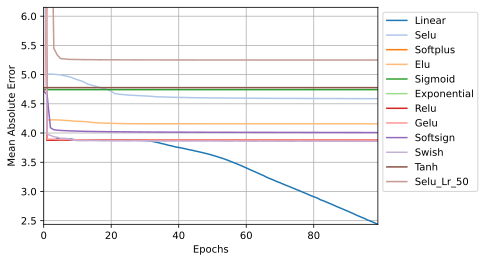

In [71]:
plot0 = HistoryPlotter(metric='mean_absolute_error')
plot0.plot(histories_activationFunctions1)

In [68]:
with open('./histories_activationFunctions1Dict', 'wb') as file_pi:
    pickle.dump(histories_activationFunctions1, file_pi)
#with open('./histories_activationFunctionsDict', "rb") as file_pi:
#    histories_activationFunctionsNew = pickle.load(file_pi)

INFO:tensorflow:Assets written to: ram://1a439a72-f960-4623-8a74-8a842fd3d90e/assets
INFO:tensorflow:Assets written to: ram://0743e33c-da22-44ca-a6f6-3708c77c24a0/assets
INFO:tensorflow:Assets written to: ram://b7de2f41-fc41-4057-86e6-5f7fa7cdacf1/assets
INFO:tensorflow:Assets written to: ram://e8c2b7c2-12d7-4bca-bf9d-e78b7fa8d558/assets
INFO:tensorflow:Assets written to: ram://dd0614ce-e4ca-4a28-9cc4-42d6b27f76ee/assets
INFO:tensorflow:Assets written to: ram://f73ee62d-25e1-4928-a9ed-3bac77aa56a2/assets
INFO:tensorflow:Assets written to: ram://0da4db56-acbb-45ed-b292-0585012f357c/assets
INFO:tensorflow:Assets written to: ram://1a709218-cf56-4f03-8c3a-4f6190a058da/assets
INFO:tensorflow:Assets written to: ram://8ca2ae6a-87bc-4ce5-bfd4-adf82aaf7d21/assets
INFO:tensorflow:Assets written to: ram://2d5e7d8d-721c-4250-b4f9-303068bac29a/assets
INFO:tensorflow:Assets written to: ram://2b13a427-7030-4b4c-8f4a-efa211addd07/assets


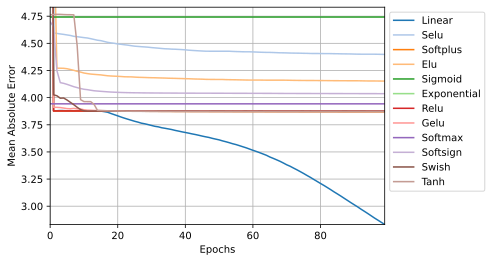

In [164]:
plot0 = HistoryPlotter(metric='mean_absolute_error')
plot0.plot(histories_activationFunctions)

In [74]:
histories_LR = {}

In [75]:
%%time
histories_LR['halving_the_learning_rate_every_2_steps'] = compile_and_fit(
    full_dnn_model_2_linear,
    max_epochs=200,
    decay_step=2,
    loss='mean_absolute_error')

CPU times: user 12min 28s, sys: 1min 34s, total: 14min 2s
Wall time: 9min 12s


In [76]:
%%time
histories_LR['halving_the_learning_rate_every_5_steps'] = compile_and_fit(
    full_dnn_model_2_linear,
    max_epochs=200,
    decay_step=5,
    loss='mean_absolute_error')

CPU times: user 12min 44s, sys: 1min 31s, total: 14min 15s
Wall time: 9min 14s


In [77]:
%%time
histories_LR['halving_the_learning_rate_every_10_steps'] = compile_and_fit(
    full_dnn_model_2_linear,
    max_epochs=200,
    decay_step=10,
    loss='mean_absolute_error')

CPU times: user 12min 39s, sys: 1min 36s, total: 14min 16s
Wall time: 9min 14s


In [78]:
%%time
histories_LR['halving_the_learning_rate_every_20_steps'] = compile_and_fit(
    full_dnn_model_2_linear,
    max_epochs=200,
    decay_step=20,
    loss='mean_absolute_error')

CPU times: user 12min 31s, sys: 1min 28s, total: 14min
Wall time: 9min 15s


In [79]:
%%time
histories_LR['halving_the_learning_rate_every_40_steps'] = compile_and_fit(
    full_dnn_model_2_linear,
    max_epochs=200,
    decay_step=40,
    loss='mean_absolute_error')

CPU times: user 12min 36s, sys: 1min 33s, total: 14min 10s
Wall time: 9min 10s


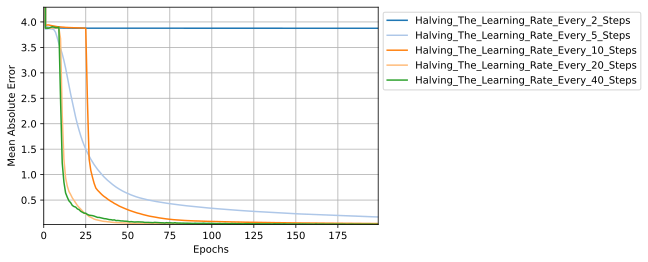

In [80]:
plot0 = HistoryPlotter(metric='mean_absolute_error')
plot0.plot(histories_LR)

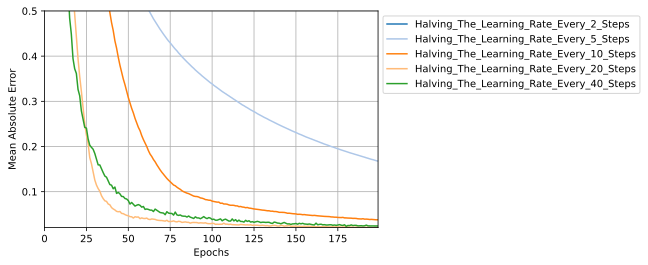

In [95]:
plot0 = HistoryPlotter(metric='mean_absolute_error')
plot0.plot(histories_LR, yMin=0, yMax=0.5)

In [81]:
with open('./histories_LRDict', 'wb') as file_pi:
    pickle.dump(histories_LR, file_pi)
#with open('./histories_LRDict', "rb") as file_pi:
#    histories_LRNew = pickle.load(file_pi)

INFO:tensorflow:Assets written to: ram://39a0a758-4d2b-4a1b-bc63-00d08c1cb809/assets


In [53]:
histories_LR_TBNN = {}

In [54]:
%%time
histories_LR_TBNN['halving_the_learning_rate_every_2_steps'] = compile_and_fitTBNN(
    TBNNModel2,
    max_epochs=100,
    decay_step=2,
    loss='mean_absolute_error')

CPU times: user 6min 43s, sys: 56 s, total: 7min 39s
Wall time: 4min 41s


In [55]:
%%time
histories_LR_TBNN['halving_the_learning_rate_every_5_steps'] = compile_and_fitTBNN(
    TBNNModel2,
    max_epochs=100,
    decay_step=5,
    loss='mean_absolute_error')

CPU times: user 6min 49s, sys: 49.9 s, total: 7min 39s
Wall time: 4min 42s


In [56]:
%%time
histories_LR_TBNN['halving_the_learning_rate_every_10_steps'] = compile_and_fitTBNN(
    TBNNModel2,
    max_epochs=100,
    decay_step=10,
    loss='mean_absolute_error')

CPU times: user 6min 41s, sys: 54.5 s, total: 7min 35s
Wall time: 4min 41s


In [57]:
%%time
histories_LR_TBNN['halving_the_learning_rate_every_20_steps'] = compile_and_fitTBNN(
    TBNNModel2,
    max_epochs=100,
    decay_step=20,
    loss='mean_absolute_error')

CPU times: user 6min 49s, sys: 50.7 s, total: 7min 40s
Wall time: 4min 41s


In [58]:
%%time
histories_LR_TBNN['halving_the_learning_rate_every_40_steps'] = compile_and_fitTBNN(
    TBNNModel2,
    max_epochs=100,
    decay_step=40,
    loss='mean_absolute_error')

CPU times: user 6min 47s, sys: 49.8 s, total: 7min 37s
Wall time: 4min 41s


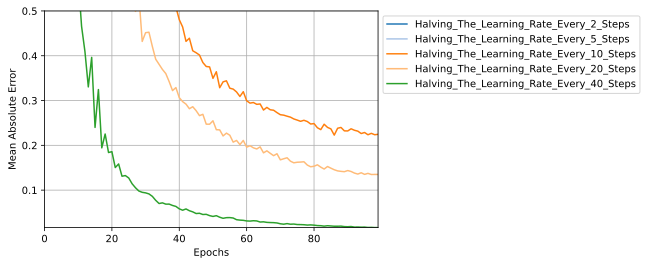

In [60]:
plot0 = HistoryPlotter(metric='mean_absolute_error')
plot0.plot(histories_LR_TBNN, yMax=0.5)

plotter = tfdocs.plots.HistoryPlotter(metric = 'mean_squared_error')
plotter.plot(histories_activationFunctions)

In [130]:
histories_Loss = {}
histories_Loss['mean_absolute_error'] = histories_activationFunctions['linear']

In [131]:
%%time
histories_Loss['mean_absolute_percentage_error'] = compile_and_fit(
    full_dnn_model_2_linear,
    max_epochs=100,
    decay_step=10,
    loss='mean_absolute_percentage_error')

CPU times: user 6min, sys: 43.1 s, total: 6min 43s
Wall time: 4min 27s


In [133]:
%%time
histories_Loss['mean_squared_error'] = compile_and_fit(
    full_dnn_model_2_linear,
    max_epochs=100,
    decay_step=10,
    loss='mean_squared_error')

CPU times: user 6min 5s, sys: 49.5 s, total: 6min 54s
Wall time: 4min 28s


In [136]:
%%time
histories_Loss['mean_squared_logarithmic_error'] = compile_and_fit(
    full_dnn_model_2_linear,
    max_epochs=100,
    decay_step=10,
    loss='mean_squared_logarithmic_error')

CPU times: user 6min 21s, sys: 48.2 s, total: 7min 9s
Wall time: 4min 39s


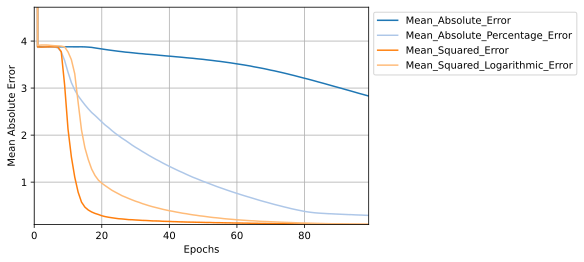

In [157]:
plot0 = HistoryPlotter(metric='mean_absolute_error')
plot0.plot(histories_Loss)

In [156]:
with open('./histories_LossDict', 'wb') as file_pi:
    pickle.dump(histories_Loss, file_pi)
#with open('./histories_LossDict', "rb") as file_pi:
#    histories_LossNew = pickle.load(file_pi)

INFO:tensorflow:Assets written to: ram://7ad617de-ad6d-40b9-a483-f15a485bbf62/assets
INFO:tensorflow:Assets written to: ram://feec7cf0-f152-4fda-8105-707e9fe7170a/assets


In [100]:
histories_LossTBNN = {}

In [101]:
%%time
histories_LossTBNN['mean_absolute_error'] = compile_and_fitTBNN(
    TBNNModel2,
    max_epochs=100,
    decay_step=20,
    loss='mean_absolute_error')

CPU times: user 7min 8s, sys: 53.8 s, total: 8min 2s
Wall time: 4min 56s


In [102]:
%%time
histories_LossTBNN['mean_absolute_percentage_error'] = compile_and_fitTBNN(
    TBNNModel2,
    max_epochs=100,
    decay_step=20,
    loss='mean_absolute_percentage_error')

CPU times: user 7min 5s, sys: 53.8 s, total: 7min 59s
Wall time: 4min 53s


In [103]:
%%time
histories_LossTBNN['mean_squared_error'] = compile_and_fitTBNN(
    TBNNModel2,
    max_epochs=100,
    decay_step=20,
    loss='mean_squared_error')

CPU times: user 6min 57s, sys: 50.3 s, total: 7min 47s
Wall time: 4min 46s


In [104]:
%%time
histories_LossTBNN['mean_squared_logarithmic_error'] = compile_and_fitTBNN(
    TBNNModel2,
    max_epochs=100,
    decay_step=20,
    loss='mean_squared_logarithmic_error')

CPU times: user 7min 10s, sys: 58 s, total: 8min 8s
Wall time: 4min 57s


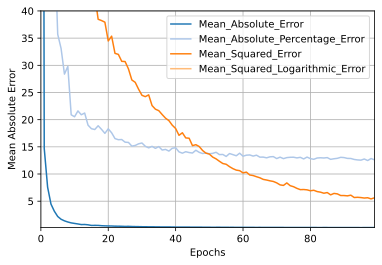

In [115]:
plot0 = HistoryPlotter(metric='mean_absolute_error')
plot0.plot(histories_LossTBNN, yMax=40)

In [73]:
historiesModels = {}
#historiesModels['DNN2'] = histories_activationFunctions['linear']

In [74]:
%%time
historiesModels['DNN2'] = compile_and_fit(
    full_dnn_model_2_linear,
    max_epochs=100,
    decay_step=10,
    loss='mean_absolute_error')

CPU times: user 6min 13s, sys: 44.6 s, total: 6min 57s
Wall time: 4min 33s


In [75]:
%%time
historiesModels['TBNN2'] = compile_and_fitTBNN(
    TBNNModel2,
    max_epochs=100,
    decay_step=10,
    loss='mean_absolute_error')

CPU times: user 6min 51s, sys: 50.3 s, total: 7min 42s
Wall time: 4min 44s


In [76]:
%%time
historiesModels['TBNN2Concat'] = compile_and_fitTBNN(
    TBNNModel2Concat,
    max_epochs=100,
    decay_step=10,
    loss='mean_absolute_error')

CPU times: user 6min 55s, sys: 50.1 s, total: 7min 45s
Wall time: 4min 46s


In [77]:
%%time
historiesModels['TBNN2Swaped'] = compile_and_fitTBNN(
    TBNNModel2Swaped,
    max_epochs=100,
    decay_step=10,
    loss='mean_absolute_error')

CPU times: user 6min 35s, sys: 45.7 s, total: 7min 21s
Wall time: 4min 52s


historiesModels['TBNNModel2Swaped'] = historiesModels['TBNNModel2Upend']
del historiesModels['TBNNModel2Upend']

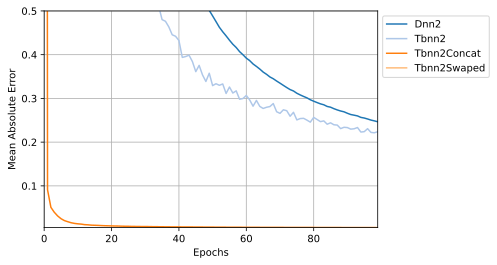

In [78]:
plot0 = HistoryPlotter(metric='mean_absolute_error')
plot0.plot(historiesModels, yMax=0.5)

In [ ]:
%%time
historiesModels['DNN3'] = compile_and_fit(
    full_dnn_model_3,
    max_epochs=200,
    decay_step=10,
    loss='mean_squared_error')

In [89]:
%%time
historiesModels['TBNN3'] = compile_and_fitTBNN(
    TBNNModel3,
    max_epochs=200,
    decay_step=10,
    loss='mean_squared_error')

CPU times: user 14min 45s, sys: 2min 8s, total: 16min 54s
Wall time: 10min 1s


In [ ]:
plot0 = HistoryPlotter(metric='mean_absolute_error')
plot0.plot(historiesModels)

In [ ]:
plot0 = HistoryPlotter(metric='mean_squared_error')
plot0.plot(historiesModels)

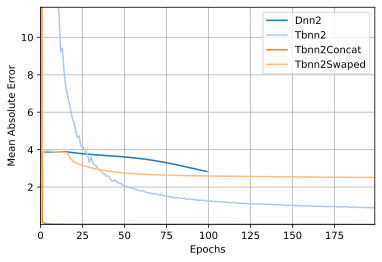

In [167]:
plot0 = HistoryPlotter(metric='mean_absolute_error')
plot0.plot(historiesModels)

In [129]:
with open('./historiesModelsDict', 'wb') as file_pi:
    pickle.dump(historiesModels, file_pi)
#with open('./historiesModelsDict', "rb") as file_pi:
#    historiesModelsNew = pickle.load(file_pi)

INFO:tensorflow:Assets written to: ram://c01a6fbe-0fac-4556-b2e9-e397b0ef49dc/assets
INFO:tensorflow:Assets written to: ram://4a36f51d-64e5-4c81-879a-84a5be42fd6d/assets
INFO:tensorflow:Assets written to: ram://01fe6f5b-0b25-40f7-84a4-d564d98b7f12/assets
INFO:tensorflow:Assets written to: ram://14af45be-5c4a-4557-8d8c-026eb510c0b5/assets


In [ ]:
%%time
histories['TBNNModel3'] = compile_and_fitTBNN(
    TBNNModel3,
    max_epochs=50)

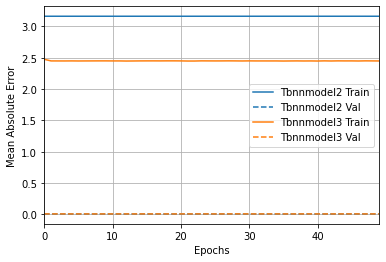

In [99]:
plotter = tfdocs.plots.HistoryPlotter(metric = 'mean_absolute_error')
plotter.plot(histories)

In [100]:
%%time
histories['TBNNModel4'] = compile_and_fitTBNN(
    TBNNModel4,
    max_epochs=50)

KeyboardInterrupt: 

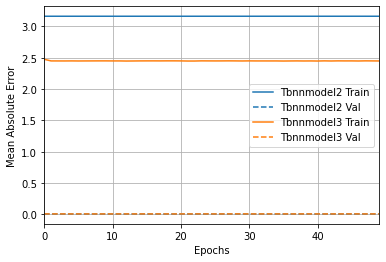

In [101]:
plotter = tfdocs.plots.HistoryPlotter(metric = 'mean_absolute_error')
plotter.plot(histories)

In [102]:
%%time
histories['TBNNModel2Upend'] = compile_and_fitTBNN(
    TBNNModel2Upend,
    max_epochs=50)

KeyboardInterrupt: 

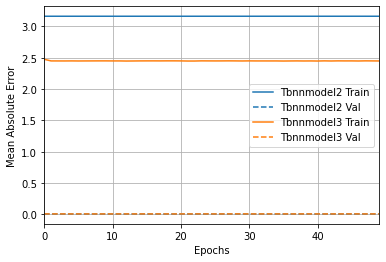

In [103]:
plotter = tfdocs.plots.HistoryPlotter(metric = 'mean_absolute_error')
plotter.plot(histories)

In [175]:
%%time
histories['full_dnn_model_2'] = compile_and_fit(
    full_dnn_model_2,
    max_epochs=50)

Epoch 1/50
3000/3750 [=======================>......] - ETA: 0s - loss: 3.7325 - mean_absolute_error: 3.7325

KeyboardInterrupt: 

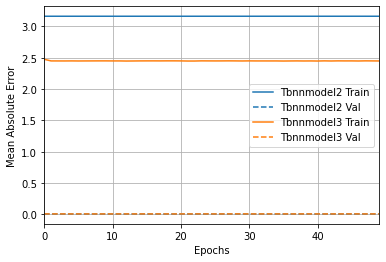

In [105]:
plotter = tfdocs.plots.HistoryPlotter(metric = 'mean_absolute_error')
plotter.plot(histories)

In [106]:
%%time
histories['full_dnn_model_3'] = compile_and_fit(
    full_dnn_model_3,
    max_epochs=50)

KeyboardInterrupt: 

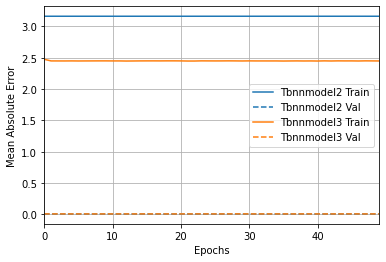

In [107]:
plotter = tfdocs.plots.HistoryPlotter(metric = 'mean_absolute_error')
plotter.plot(histories)

In [108]:
%%time
histories['full_dnn_model_4'] = compile_and_fit(
    full_dnn_model_4,
    max_epochs=50)

Exception ignored in: <function WeakKeyDictionary.__init__.<locals>.remove at 0x7f717b791c10>
Traceback (most recent call last):
  File "/home/romanovadi/anaconda3/lib/python3.9/weakref.py", line 370, in remove
    def remove(k, selfref=ref(self)):
KeyboardInterrupt: 


KeyboardInterrupt: 

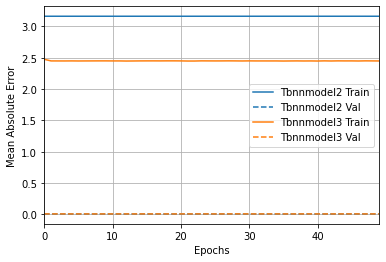

In [109]:
plotter = tfdocs.plots.HistoryPlotter(metric = 'mean_absolute_error')
plotter.plot(histories)

In [20]:
%%time
TBNNModel_batch_train = keras.Model(
    inputs=[inputs_long_, inputs_short_],
    outputs=outputs,
)
name = "TBNNModel_batch_train"
version = "_1"
model = TBNNModel_batch_train
saved_models_dir = "/home/nargiza/repo_2/tbnnTurbulenceTraining/" + \
    "constantAngleSlopeDNS_U4e-1_A5_H1e-2_RANSsets/saved_model"
model_dir = os.path.join(saved_models_dir, name + version)
if (not os.path.exists(model_dir)):
    os.mkdir(model_dir)
filepath = os.path.join(model_dir, "{epoch:03d}-{val_loss:.4f}.h5")
checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath = filepath,
                                 monitor='val_loss',
                                 save_best_only=True,
                                 save_weights_only = True)
batch_size = 5000
steps_per_epoch = len(trainData) // batch_size

lr_schedule = tf.keras.optimizers.schedules.InverseTimeDecay(
    0.001,
    decay_steps=steps_per_epoch*10,
    decay_rate=1,
    staircase=False)


def get_optimizer(lr_schedule=lr_schedule):
    return tf.keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999)# lr_schedule)

optimizer = get_optimizer()
model.compile(optimizer=optimizer,
                 loss='mean_absolute_error',
                 metrics=[tf.keras.metrics.MeanAbsoluteError(
                 name='mean_absolute_error')])

model.summary()
TSL = timeStepsList()
TSL = TSL[:3]
batches_num = len(TSL)
epochs_num = 10
for i in range(epochs_num):
    real_i = epochs_num % batches_num
    trainData = formDataset([TSL[real_i]], 1, MLturbRANSfolder, FsScalars, FsVectors,\
                                FsTensors, FsSymmTensors, FsSkewSymmTensors, size)
    steps_per_epoch = len(trainData) // batch_size
    trainData.sample(frac=1)
    train_target = trainData.loc[:, target_labels]
    train_features_short = trainData.loc[:, short_input_labels]
    train_features_long = trainData.loc[:, long_input_labels]
        
    model.fit(
        [train_features_long, train_features_short],
        train_target,
        steps_per_epoch = steps_per_epoch,
        epochs = 2,
        validation_split = 0.2,
        verbose = 1,
        callbacks = [checkpoint],
        use_multiprocessing = True)
model.save(os.path.join(model_dir, name + "_model"))

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 Tensor_input_layer (InputLayer  [(None, 97)]        0           []                               
 )                                                                                                
                                                                                                  
 normalization (Normalization)  (None, 97)           195         ['Tensor_input_layer[0][0]']     
                                                                                                  
 First_hidden_layer (Dense)     (None, 64)           6272        ['normalization[0][0]']          
                                                                                                  
 Flow_parameters_input_layer (I  [(None, 9)]         0           []                           

INFO:tensorflow:Assets written to: /home/nargiza/repo_2/tbnnTurbulenceTraining/constantAngleSlopeDNS_U4e-1_A5_H1e-2_RANSsets/saved_model/TBNNModel_batch_train_1/TBNNModel_batch_train_model/assets


INFO:tensorflow:Assets written to: /home/nargiza/repo_2/tbnnTurbulenceTraining/constantAngleSlopeDNS_U4e-1_A5_H1e-2_RANSsets/saved_model/TBNNModel_batch_train_1/TBNNModel_batch_train_model/assets


CPU times: user 13min 4s, sys: 35.1 s, total: 13min 39s
Wall time: 12min 41s


In [25]:
%%time
TSL = timeStepsList()
testTSL = TSL[-2:]
testData = formDataset(testTSL, len(testTSL), MLturbRANSfolder, FsScalars, FsVectors, FsTensors, 
                        FsSymmTensors, FsSkewSymmTensors, size)

test_target = testData.loc[:, target_labels]
test_features_short = testData.loc[:, short_input_labels]
test_features_long = testData.loc[:, long_input_labels]


/usr/lib/python3/dist-packages/pandas/core/frame.py:7134: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return concat(


CPU times: user 2min 23s, sys: 5.18 s, total: 2min 28s
Wall time: 2min 29s


In [31]:
all_models = {}
all_models[name + version] = model.evaluate(
    [test_features_long, test_features_short],
    test_target,
    verbose=0)
pd.DataFrame(all_models).T

,0,1
TBNNModel_batch_train_1,0.066554,0.066554


In [38]:
loaded_model = keras.models.load_model(os.path.join(model_dir, name + "_model"))
loaded_model.compile(optimizer=optimizer,
                 loss='mean_absolute_error',
                 metrics=[tf.keras.metrics.MeanAbsoluteError(
                 name='mean_absolute_error')])
#TODO: load weights from the last modified file with weights ('cause last = best when we use
# save_best_only = True)
loaded_model.load_weights(os.path.join(model_dir,'001-0.0201.h5'))

In [39]:
all_models[name + version + '_loaded_from_best_epoch'] = loaded_model.evaluate(
    [test_features_long, test_features_short],
    test_target,
    verbose=0)
pd.DataFrame(all_models).T

,0,1
TBNNModel_batch_train_1,0.066554,0.066554
TBNNModel_batch_train_1_loaded,0.067113,0.067113
TBNNModel_batch_train_1_loaded_from_best_epoch,0.067113,0.067113


In [40]:
model.save_weights(os.path.join(model_dir, 'last_epoch.h5'))

loaded_model = keras.models.load_model(os.path.join(model_dir, name + "_model"))
loaded_model.compile(optimizer=optimizer,
                 loss='mean_absolute_error',
                 metrics=[tf.keras.metrics.MeanAbsoluteError(
                 name='mean_absolute_error')])
loaded_model.load_weights(os.path.join(model_dir,'last_epoch.h5'))

In [41]:
all_models[name + version + '_loaded_from_last_epoch'] = loaded_model.evaluate(
    [test_features_long, test_features_short],
    test_target,
    verbose=0)
pd.DataFrame(all_models).T
#so we save best weights during training, and we can also save the weights after all epochs
# .evaluate method uses weights from last epoch even if they are not the best?

,0,1
TBNNModel_batch_train_1,0.066554,0.066554
TBNNModel_batch_train_1_loaded,0.067113,0.067113
TBNNModel_batch_train_1_loaded_from_best_epoch,0.067113,0.067113
TBNNModel_batch_train_1_loaded_from_last_epoch,0.066554,0.066554


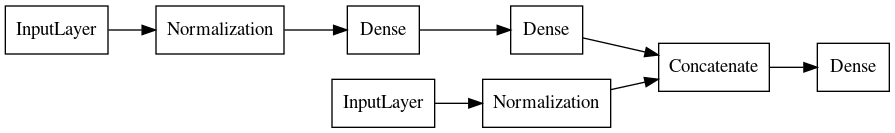

In [50]:
keras.utils.plot_model(TBNNModel_changed_branches, "multi_input_and_output_model.png", show_layer_names=False, rankdir='LR')

## Model Training (old results, no batches)

In [54]:
histories = {}

In [42]:
%%time
histories['TBNNModel'] = compile_and_fitTBNN(
#histories['TBNNModel'] = compile_and_fit(
    TBNNModel,
    'TBNNModel',
#    [inputs_long, inputs_short],
#    train_target,
    max_epochs=50)#,
    #callbacks=[cp_callback])

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 Flow_parameters_input_layer (I  [(None, 30)]        0           []                               
 nputLayer)                                                                                       
                                                                                                  
 normalization_2 (Normalization  (None, 30)          61          ['Flow_parameters_input_layer[0][
 )                                                               0]']                             
                                                                                                  
 First_hidden_layer (Dense)     (None, 64)           1984        ['normalization_2[0][0]']        
                                                                                              

Epoch 34/50
120/120 [==============================] - 2s 15ms/step - loss: 0.0238 - mean_absolute_error: 0.0238 - val_loss: 0.0126 - val_mean_absolute_error: 0.0126
Epoch 35/50
120/120 [==============================] - 2s 16ms/step - loss: 0.0234 - mean_absolute_error: 0.0234 - val_loss: 0.0085 - val_mean_absolute_error: 0.0085
Epoch 36/50
120/120 [==============================] - 2s 16ms/step - loss: 0.0242 - mean_absolute_error: 0.0242 - val_loss: 0.0100 - val_mean_absolute_error: 0.0100
Epoch 37/50
120/120 [==============================] - 2s 15ms/step - loss: 0.0249 - mean_absolute_error: 0.0249 - val_loss: 0.0105 - val_mean_absolute_error: 0.0105
Epoch 38/50
120/120 [==============================] - 2s 16ms/step - loss: 0.0264 - mean_absolute_error: 0.0264 - val_loss: 0.0249 - val_mean_absolute_error: 0.0249
Epoch 39/50
120/120 [==============================] - 2s 15ms/step - loss: 0.0262 - mean_absolute_error: 0.0262 - val_loss: 0.0203 - val_mean_absolute_error: 0.0203
Epoc

In [51]:
%%time
#DATA:
#long_input_labels = invar_labels
#short_input_labels = tensor_labels + grad_labels + vector_labels + param_labels
histories['TBNNModel'] = compile_and_fitTBNN(
#histories['TBNNModel'] = compile_and_fit(
    TBNNModel,
    'TBNNModel',
#    [inputs_long, inputs_short],
#    train_target,
    max_epochs=100)#,
    #callbacks=[cp_callback])

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 Flow_parameters_input_layer (I  [(None, 9)]         0           []                               
 nputLayer)                                                                                       
                                                                                                  
 normalization_2 (Normalization  (None, 9)           19          ['Flow_parameters_input_layer[0][
 )                                                               0]']                             
                                                                                                  
 First_hidden_layer (Dense)     (None, 64)           640         ['normalization_2[1][0]']        
                                                                                            

120/120 [==============================] - 7s 59ms/step - loss: 0.5030 - mean_absolute_error: 0.5030 - val_loss: 0.1764 - val_mean_absolute_error: 0.1764
Epoch 83/100
120/120 [==============================] - 7s 57ms/step - loss: 0.5023 - mean_absolute_error: 0.5023 - val_loss: 0.1759 - val_mean_absolute_error: 0.1759
Epoch 84/100
120/120 [==============================] - 7s 57ms/step - loss: 0.5014 - mean_absolute_error: 0.5014 - val_loss: 0.1758 - val_mean_absolute_error: 0.1758
Epoch 85/100
120/120 [==============================] - 7s 57ms/step - loss: 0.5007 - mean_absolute_error: 0.5007 - val_loss: 0.1756 - val_mean_absolute_error: 0.1756
Epoch 86/100
120/120 [==============================] - 7s 57ms/step - loss: 0.5000 - mean_absolute_error: 0.5000 - val_loss: 0.1748 - val_mean_absolute_error: 0.1748
Epoch 87/100
120/120 [==============================] - 7s 58ms/step - loss: 0.4992 - mean_absolute_error: 0.4992 - val_loss: 0.1751 - val_mean_absolute_error: 0.1751
Epoch 88/10

In [88]:
%%time
#DATA:
#long_input_labels = tensor_labels + grad_labels + vector_labels + param_labels
#short_input_labels = invar_labels

histories['TBNNModel_changed_branches'] = compile_and_fitTBNN(
#histories['TBNNModel'] = compile_and_fit(
    TBNNModel_changed_branches,
    'TBNNModel_changed_branches',
#    [inputs_long, inputs_short],
#    train_target,
    max_epochs=100)#,
    #callbacks=[cp_callback])

Model: "model_6"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 Tensor_input_layer (InputLayer  [(None, 97)]        0           []                               
 )                                                                                                
                                                                                                  
 normalization_8 (Normalization  (None, 97)          195         ['Tensor_input_layer[0][0]']     
 )                                                                                                
                                                                                                  
 First_hidden_layer (Dense)     (None, 64)           6272        ['normalization_8[1][0]']        
                                                                                            

120/120 [==============================] - 5s 42ms/step - loss: 0.0348 - mean_absolute_error: 0.0348 - val_loss: 0.0121 - val_mean_absolute_error: 0.0121
Epoch 83/100
120/120 [==============================] - 5s 42ms/step - loss: 0.0278 - mean_absolute_error: 0.0278 - val_loss: 0.0131 - val_mean_absolute_error: 0.0131
Epoch 84/100
120/120 [==============================] - 5s 42ms/step - loss: 0.0321 - mean_absolute_error: 0.0321 - val_loss: 0.0143 - val_mean_absolute_error: 0.0143
Epoch 85/100
120/120 [==============================] - 5s 39ms/step - loss: 0.0281 - mean_absolute_error: 0.0281 - val_loss: 0.0138 - val_mean_absolute_error: 0.0138
Epoch 86/100
120/120 [==============================] - 5s 44ms/step - loss: 0.0343 - mean_absolute_error: 0.0343 - val_loss: 0.0182 - val_mean_absolute_error: 0.0182
Epoch 87/100
120/120 [==============================] - 5s 41ms/step - loss: 0.0377 - mean_absolute_error: 0.0377 - val_loss: 0.0189 - val_mean_absolute_error: 0.0189
Epoch 88/10

In [30]:
%%time
#DATA:
#shuffled_data
#long_input_labels = tensor_labels + grad_labels + vector_labels + param_labels
#short_input_labels = invar_labels

TBNNModel_changed_branches_2 = keras.Model(
    inputs=[inputs_long, inputs_short],
    outputs=outputs,
)

histories['TBNNModel_changed_branches_2'] = compile_and_fitTBNN(
    TBNNModel_changed_branches_2,
    'TBNNModel_changed_branches_2',
    max_epochs=100)

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 Tensor_input_layer (InputLayer  [(None, 97)]        0           []                               
 )                                                                                                
                                                                                                  
 normalization_1 (Normalization  (None, 97)          195         ['Tensor_input_layer[0][0]']     
 )                                                                                                
                                                                                                  
 First_hidden_layer (Dense)     (None, 64)           6272        ['normalization_1[0][0]']        
                                                                                            

120/120 [==============================] - 4s 35ms/step - loss: 0.0314 - mean_absolute_error: 0.0314 - val_loss: 0.0132 - val_mean_absolute_error: 0.0132
Epoch 83/100
120/120 [==============================] - 4s 37ms/step - loss: 0.0330 - mean_absolute_error: 0.0330 - val_loss: 0.0095 - val_mean_absolute_error: 0.0095
Epoch 84/100
120/120 [==============================] - 4s 35ms/step - loss: 0.0334 - mean_absolute_error: 0.0334 - val_loss: 0.0197 - val_mean_absolute_error: 0.0197
Epoch 85/100
120/120 [==============================] - 4s 36ms/step - loss: 0.0335 - mean_absolute_error: 0.0335 - val_loss: 0.0107 - val_mean_absolute_error: 0.0107
Epoch 86/100
120/120 [==============================] - 4s 36ms/step - loss: 0.0356 - mean_absolute_error: 0.0356 - val_loss: 0.0087 - val_mean_absolute_error: 0.0087
Epoch 87/100
120/120 [==============================] - 4s 36ms/step - loss: 0.0371 - mean_absolute_error: 0.0371 - val_loss: 0.0102 - val_mean_absolute_error: 0.0102
Epoch 88/10

In [66]:
%%time
#DATA:
#shuffled_data
#long_input_labels = tensor_labels + grad_labels + vector_labels + param_labels
#short_input_labels = invar_labels

TBNNModel_changed_branches_3 = keras.Model(
    inputs=[inputs_long_, inputs_short_],
    outputs=outputs,
)

histories['TBNNModel_changed_branches_3'] = compile_and_fit(
    TBNNModel_changed_branches_3,
    'TBNNModel_changed_branches_3',
    [train_features_long, train_features_short],
    train_target,
    k = 1,
    max_epochs=200)

Model: "model_13"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 Tensor_input_layer (InputLayer  [(None, 97)]        0           []                               
 )                                                                                                
                                                                                                  
 normalization_4 (Normalization  (None, 97)          195         ['Tensor_input_layer[0][0]']     
 )                                                                                                
                                                                                                  
 First_hidden_layer (Dense)     (None, 64)           6272        ['normalization_4[3][0]']        
                                                                                           

120/120 [==============================] - 7s 56ms/step - loss: 0.0372 - mean_absolute_error: 0.0372 - val_loss: 0.0208 - val_mean_absolute_error: 0.0208
Epoch 83/200
120/120 [==============================] - 7s 55ms/step - loss: 0.0351 - mean_absolute_error: 0.0351 - val_loss: 0.0141 - val_mean_absolute_error: 0.0141
Epoch 84/200
120/120 [==============================] - 6s 54ms/step - loss: 0.0320 - mean_absolute_error: 0.0320 - val_loss: 0.0125 - val_mean_absolute_error: 0.0125
Epoch 85/200
120/120 [==============================] - 6s 54ms/step - loss: 0.0338 - mean_absolute_error: 0.0338 - val_loss: 0.0141 - val_mean_absolute_error: 0.0141
Epoch 86/200
120/120 [==============================] - 3857s 32s/step - loss: 0.0323 - mean_absolute_error: 0.0323 - val_loss: 0.0145 - val_mean_absolute_error: 0.0145
Epoch 87/200
120/120 [==============================] - 7s 56ms/step - loss: 0.0328 - mean_absolute_error: 0.0328 - val_loss: 0.0247 - val_mean_absolute_error: 0.0247
Epoch 88/

Epoch 131/200
120/120 [==============================] - 7s 55ms/step - loss: 0.0298 - mean_absolute_error: 0.0298 - val_loss: 0.0189 - val_mean_absolute_error: 0.0189
Epoch 132/200
120/120 [==============================] - 7s 55ms/step - loss: 0.0324 - mean_absolute_error: 0.0324 - val_loss: 0.0166 - val_mean_absolute_error: 0.0166
Epoch 133/200
120/120 [==============================] - 7s 58ms/step - loss: 0.0301 - mean_absolute_error: 0.0301 - val_loss: 0.0074 - val_mean_absolute_error: 0.0074
Epoch 134/200
120/120 [==============================] - 7s 62ms/step - loss: 0.0308 - mean_absolute_error: 0.0308 - val_loss: 0.0209 - val_mean_absolute_error: 0.0209
Epoch 135/200
120/120 [==============================] - 7s 58ms/step - loss: 0.0348 - mean_absolute_error: 0.0348 - val_loss: 0.0113 - val_mean_absolute_error: 0.0113
Epoch 136/200
120/120 [==============================] - 7s 62ms/step - loss: 0.0335 - mean_absolute_error: 0.0335 - val_loss: 0.0175 - val_mean_absolute_error:

Epoch 180/200
120/120 [==============================] - 7s 58ms/step - loss: 0.0308 - mean_absolute_error: 0.0308 - val_loss: 0.0173 - val_mean_absolute_error: 0.0173
Epoch 181/200
120/120 [==============================] - 7s 60ms/step - loss: 0.0279 - mean_absolute_error: 0.0279 - val_loss: 0.0122 - val_mean_absolute_error: 0.0122
Epoch 182/200
120/120 [==============================] - 7s 56ms/step - loss: 0.0309 - mean_absolute_error: 0.0309 - val_loss: 0.0138 - val_mean_absolute_error: 0.0138
Epoch 183/200
120/120 [==============================] - 7s 57ms/step - loss: 0.0282 - mean_absolute_error: 0.0282 - val_loss: 0.0109 - val_mean_absolute_error: 0.0109
Epoch 184/200
120/120 [==============================] - 7s 55ms/step - loss: 0.0297 - mean_absolute_error: 0.0297 - val_loss: 0.0162 - val_mean_absolute_error: 0.0162
Epoch 185/200
120/120 [==============================] - 7s 56ms/step - loss: 0.0285 - mean_absolute_error: 0.0285 - val_loss: 0.0124 - val_mean_absolute_error:

In [34]:
#TBNNModel.save('saved_model/TBNNModel_shuffled_data')

INFO:tensorflow:Assets written to: saved_model/TBNNModel_shuffled_data/assets


INFO:tensorflow:Assets written to: saved_model/TBNNModel_shuffled_data/assets


In [ ]:
TBNNModel_prediction_prepared = preparePrediction(TBNNModel_prediction, testData)
writePrediction(TBNNModel_prediction_prepared[['dU0', 'dU1', 'dU2']], 'vector', testTSL, MLturbRANSfolder ,'dU')
writePrediction(TBNNModel_prediction_prepared[['dp']], 'scalar', testTSL, MLturbRANSfolder ,'dp')
writePrediction(TBNNModel_prediction_prepared[['dAW']], 'scalar', testTSL, MLturbRANSfolder ,'dAW')

In [33]:
full_dnn_models = {}

In [36]:
full_dnn_models['TBNNModel_shuffled_data'] = TBNNModel.evaluate(
    [test_features_long, test_features_short],
    test_target,
    verbose=0)

In [91]:
pd.DataFrame(full_dnn_models).T

,0,1
TBNNModel_shuffled_data,0.287408,0.287408
TBNNModel_shuffled_data_train_check,0.288300,0.288300
TBNNModel,0.424738,0.424738
TBNNModel_train_check,0.426027,0.426027
TBNNModel_changed_branches,0.040257,0.040257
TBNNModel_changed_branches_train_check,0.039990,0.039990


In [68]:
pd.DataFrame(full_dnn_models).T

,0,1
TBNNModel_changed_branches_2,0.033976,0.033976
TBNNModel_changed_branches_2_train_check,0.034008,0.034008
TBNNModel_changed_branches_3,0.027513,0.027513
TBNNModel_changed_branches_3_train_check,0.027574,0.027574


In [38]:
full_dnn_models['TBNNModel_shuffled_data_train_check'] = TBNNModel.evaluate(
    [train_features_long, train_features_short],
    train_target,
    verbose=0)

In [52]:
full_dnn_models['TBNNModel'] = TBNNModel.evaluate(
    [test_features_long, test_features_short],
    test_target,
    verbose=0)
full_dnn_models['TBNNModel_train_check'] = TBNNModel.evaluate(
    [train_features_long, train_features_short],
    train_target,
    verbose=0)

In [90]:
full_dnn_models['TBNNModel_changed_branches'] = TBNNModel_changed_branches.evaluate(
    [test_features_long, test_features_short],
    test_target,
    verbose=0)
full_dnn_models['TBNNModel_changed_branches_train_check'] = TBNNModel_changed_branches.evaluate(
    [train_features_long, train_features_short],
    train_target,
    verbose=0)

In [34]:
full_dnn_models['TBNNModel_changed_branches_2'] = TBNNModel_changed_branches_2.evaluate(
    [test_features_long, test_features_short],
    test_target,
    verbose=0)
full_dnn_models['TBNNModel_changed_branches_2_train_check'] = TBNNModel_changed_branches_2.evaluate(
    [train_features_long, train_features_short],
    train_target,
    verbose=0)

In [67]:
full_dnn_models['TBNNModel_changed_branches_3'] = TBNNModel_changed_branches_3.evaluate(
    [test_features_long, test_features_short],
    test_target,
    verbose=0)
full_dnn_models['TBNNModel_changed_branches_3_train_check'] = TBNNModel_changed_branches_3.evaluate(
    [train_features_long, train_features_short],
    train_target,
    verbose=0)

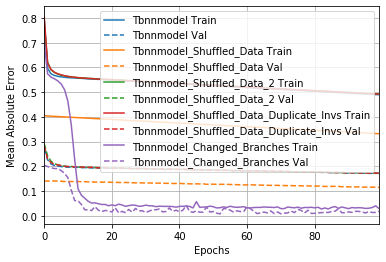

In [92]:
plotter = tfdocs.plots.HistoryPlotter(metric = 'mean_absolute_error')
plotter.plot(histories)
#plt.ylim([0., 0.5])

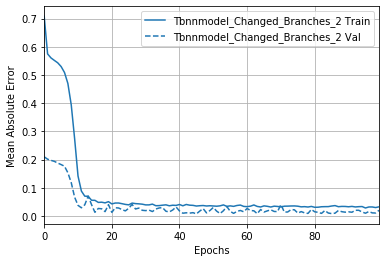

In [32]:
plotter = tfdocs.plots.HistoryPlotter(metric = 'mean_absolute_error')
plotter.plot(histories)
#plt.ylim([0., 0.5])

In [ ]:
plotter = tfdocs.plots.HistoryPlotter(metric = 'mean_absolute_error')
plotter.plot(histories)
plt.yscale('log')

In [ ]:
plotter = tfdocs.plots.HistoryPlotter(metric = 'mean_absolute_error')
plotter.plot(histories)
plt.ylim([0., 0.05])

In [ ]:
#!mkdir -p saved_model
#lnModel.save('lnModel.h5')
#lnModel = load_model('lnModel')

In [ ]:
#def TBNNModel_optimizer(hp):
#    hp_units1 = hp.Int('units1', min_value=8, max_value=80, step=8)
#    hp_units2 = hp.Int('units2', min_value=8, max_value=80, step=8)
#    #hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])
#    hp_activation = hp.Choice('activation', values=['elu', 'relu'])
#    
#    inputs_no_tensors = keras.Input(shape=(len(train_features_no_tensors.columns),),
#                                    name='Flow_parameters_input_layer')
#    inputs_tensors = keras.Input(shape=(len(train_features_tensors.columns),),
#                                 name='Tensor_input_layer')
#    norm_no_tensors = normalizer_no_tensors(inputs_no_tensors)
#    norm_tensors = normalizer_tensors(inputs_tensors)
#    denseLayer1 = layers.Dense(units=hp_units1,
#                               activation=hp_activation,
#                               name='First_hidden_layer')(norm_no_tensors)
#    denseLayer2 = layers.Dense(units=hp_units2,
#                               activation=hp_activation,
#                               name='Second_hidden_layer')(denseLayer1)
#    concat = layers.concatenate([denseLayer2, norm_tensors],
#                            name='Parameters_concatenation')
#    outputs = layers.Dense(len(train_labels.columns), name='Last_hidden_layer')(concat)
#    TBNNModel = keras.Model(
#        inputs=[inputs_no_tensors, inputs_tensors],
#        outputs=outputs,
#    )
#    
#    TBNNModel.compile(
#        optimizer=get_optimizer(),
#        #optimizer=keras.optimizers.Adam(learning_rate=hp_learning_rate),
#        #optimizer=keras.optimizers.Adam(learning_rate=0.001),
#        loss='mean_absolute_error',
#        metrics=[tf.keras.metrics.MeanAbsoluteError(name='mean_absolute_error')])
#    return TBNNModel

In [ ]:
#tuner = kt.Hyperband(TBNNModel_optimizer,
#                     objective='val_loss',
#                     max_epochs=10,
#                     factor=3,
#                     directory='TBNNModelHpTuning',
#                     project_name='TBNNModelHpBest')

In [ ]:
#stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

In [ ]:
#%%time
#tuner.search(
#    [train_features_no_tensors, train_features_tensors],
#    train_labels,
#    epochs=50,
#    validation_split=0.2,
#    callbacks=[stop_early])

In [ ]:
# Get the optimal hyperparameters
#best_hps=tuner.get_best_hyperparameters(num_trials=1)[0]
#
#print(f"""
#The hyperparameter search is complete. The optimal number of units in the first densely-connected
#layer is {best_hps.get('units1')}, the optimal number of units in the second densely-connected
#layer is {best_hps.get('units2')}, the optimal activation function
#is {best_hps.get('activation')}.
#""")

In [ ]:
#%%time
#TBNNModelHpBest = tuner.hypermodel.build(best_hps)
#histories['TBNNModelHpBest'] = TBNNModelHpBest.fit(
#    [train_features_no_tensors, train_features_tensors],
#    train_labels,
#    epochs=50,
#    validation_split=0.2)

In [ ]:
full_dnn_model_1 = keras.Sequential([
    normalizer,
    layers.Dense(64, activation='relu'),
    layers.Dense(N_LABELS)
])

In [ ]:
%%time
histories['full_dnn_model_1'] = compile_and_fit(
    full_dnn_model_1,
    'full_dnn_model_1',
    max_epochs=50)

In [ ]:
full_dnn_models['full_dnn_model_1'] = full_dnn_model_1.evaluate(
    test_features,
    test_labels,
    verbose=0)

In [ ]:
pd.DataFrame(full_dnn_models).T

In [ ]:
plotter = tfdocs.plots.HistoryPlotter(metric = 'mean_absolute_error')
plotter.plot(histories)
plt.ylim([0., 0.5])

In [ ]:
plotter = tfdocs.plots.HistoryPlotter(metric = 'mean_absolute_error')
plotter.plot(histories)
plt.yscale('log')

In [ ]:
plotter = tfdocs.plots.HistoryPlotter(metric = 'mean_absolute_error')
plotter.plot(histories)
plt.ylim([0., 0.05])

In [ ]:
full_dnn_model_2 = keras.Sequential([
    normalizer,
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(N_LABELS)
])

In [ ]:
%%time
histories['full_dnn_model_2'] = compile_and_fit(
    full_dnn_model_2,
    'full_dnn_model_2',
    max_epochs=50)

In [ ]:
full_dnn_models['full_dnn_model_2'] = full_dnn_model_2.evaluate(
    test_features,
    test_labels,
    verbose=0)

In [ ]:
pd.DataFrame(full_dnn_models).T

In [ ]:
plotter = tfdocs.plots.HistoryPlotter(metric = 'mean_absolute_error')
plotter.plot(histories)
plt.ylim([0., 0.5])

In [ ]:
plotter = tfdocs.plots.HistoryPlotter(metric = 'mean_absolute_error')
plotter.plot(histories)
plt.yscale('log')

In [ ]:
plotter = tfdocs.plots.HistoryPlotter(metric = 'mean_absolute_error')
plotter.plot(histories)
plt.ylim([0., 0.05])

In [ ]:
full_dnn_model_3 = keras.Sequential([
    normalizer,
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(N_LABELS)
])

In [ ]:
%%time
histories['full_dnn_model_3'] = compile_and_fit(
    full_dnn_model_3,
    'full_dnn_model_3',
    max_epochs=50)

In [ ]:
full_dnn_models['full_dnn_model_3'] = full_dnn_model_3.evaluate(
    test_features,
    test_labels,
    verbose=0)

In [ ]:
pd.DataFrame(full_dnn_models).T

In [ ]:
plotter = tfdocs.plots.HistoryPlotter(metric = 'mean_absolute_error')
plotter.plot(histories)
plt.ylim([0., 0.5])

In [ ]:
plotter = tfdocs.plots.HistoryPlotter(metric = 'mean_absolute_error')
plotter.plot(histories)
plt.yscale('log')

In [ ]:
plotter = tfdocs.plots.HistoryPlotter(metric = 'mean_absolute_error')
plotter.plot(histories)
plt.ylim([0., 0.05])

In [ ]:
full_dnn_model_4 = keras.Sequential([
    normalizer,
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(N_LABELS)
])

In [ ]:
%%time
histories['full_dnn_model_4'] = compile_and_fit(
    full_dnn_model_4,
    'full_dnn_model_4',
    max_epochs=50)

In [ ]:
full_dnn_models['full_dnn_model_4'] = full_dnn_model_4.evaluate(
    test_features,
    test_labels,
    verbose=0)

In [ ]:
pd.DataFrame(full_dnn_models).T

In [ ]:
plotter = tfdocs.plots.HistoryPlotter(metric = 'mean_absolute_error')
plotter.plot(histories)
plt.ylim([0., 0.5])

In [ ]:
plotter = tfdocs.plots.HistoryPlotter(metric = 'mean_absolute_error')
plotter.plot(histories)
plt.yscale('log')

In [ ]:
plotter = tfdocs.plots.HistoryPlotter(metric = 'mean_absolute_error')
plotter.plot(histories)
plt.ylim([0., 0.05])

In [ ]:
class LayerMultiplication(layers.Layer):
    def __init__(self, units=32):
        super(LayerMultiplication, self).__init__()
        self.units = units
    def build(self, input_shape):
        self.w = self.add_weight(shape=(input_shape[-1], self.units),
                                 initializer='random_normal',
                                 trainable=True,
                                 name='w')
        self.b = self.add_weight(shape=(self.units,),
                                 initializer='random_normal',
                                 trainable=True,
                                 name='b')

    def call(self, inputs):
        return tf.math.exp(tf.matmul(tf.math.log(tf.maximum(inputs, -2)+3), self.w) + self.b)
    
    def get_config(self):
        config = super().get_config()
        config.update({
            "w": self.w,
            "b": self.b,
        })
        return config

In [ ]:
normalizer_UPAW = tf.keras.layers.Normalization(axis=-1, mean=mean_UPAW, variance=var_UPAW)
normalizer_SR = tf.keras.layers.Normalization(axis=-1, mean=mean_SR, variance=var_SR)
normalizer_UPAWSR = tf.keras.layers.Normalization(axis=-1, mean=mean_UPAWSR, variance=var_UPAWSR)

In [ ]:
#lnModel
inputs_UPAWSR = keras.Input(shape=(len(train_features_UPAWSR.columns),))
norm_UPAWSR = normalizer_UPAWSR(inputs_UPAWSR)
multiplication = LayerMultiplication(len(train_features_UPAWSR.columns))(norm_UPAWSR)
linMembers = layers.concatenate([norm_UPAWSR, multiplication])
denseLayer1 = layers.Dense(64)(linMembers)
denseLayer2 = layers.Dense(64)(denseLayer1)
#denseLayer3 = layers.Dense(64)(denseLayer2)
outputs = layers.Dense(len(train_labels.columns))(denseLayer2)
lnModel = keras.Model(
    inputs=inputs_UPAWSR,
    outputs=outputs,
)

In [ ]:
train_features_UPAWSR.columns

In [ ]:
keras.utils.plot_model(lnModel, "multi_input_and_output_model.png", show_layer_names=False, rankdir='LR')

In [ ]:
%%time
histories['lnModel'] = compile_and_fit(
    lnModel,
    'lnModel',
    train_features=train_features_UPAWSR,
    train_labels=train_labels,
    max_epochs=50)#,
    #callbacks=[cp_callback])

In [ ]:
full_dnn_models['lnModel'] = lnModel.evaluate(
    test_features_UPAWSR,
    test_labels,
    verbose=0)

In [ ]:
pd.DataFrame(full_dnn_models).T

In [ ]:
plotter = tfdocs.plots.HistoryPlotter(metric = 'mean_absolute_error')
plotter.plot(histories)
plt.ylim([0., 0.5])

In [ ]:
plotter = tfdocs.plots.HistoryPlotter(metric = 'mean_absolute_error')
plotter.plot(histories)
plt.yscale('log')

In [ ]:
plotter = tfdocs.plots.HistoryPlotter(metric = 'mean_absolute_error')
plotter.plot(histories)
plt.ylim([0., 0.05])

In [ ]:
pd.DataFrame(full_dnn_models).T

In [ ]:
#%%time
#full_dnn_model_3_prediction = pd.DataFrame(
#    data=full_dnn_model_3.predict(test_center_features),
#    columns=test_center_labels.columns)
#full_dnn_model_3_prediction

In [ ]:
#%%time
#TBNNModel_prediction = pd.DataFrame(
#    data=TBNNModel.predict(test_center_features),
#    columns=test_center_labels.columns)
#full_dnn_model_3_prediction

In [ ]:
#full_dnn_model_3_prediction_prepared = preparePrediction(full_dnn_model_3_prediction, testCenterData)
#writePrediction(full_dnn_model_3_prediction_prepared[['dU0', 'dU1', 'dU2']], 'vector', testCenterTSL, MLturbRANSfolder ,'dU')
#writePrediction(full_dnn_model_3_prediction_prepared[['dp']], 'scalar', testCenterTSL, MLturbRANSfolder ,'dp')
#writePrediction(full_dnn_model_3_prediction_prepared[['dAW']], 'scalar', testCenterTSL, MLturbRANSfolder ,'dAW')

#TBNNModel_prediction_prepared = preparePrediction(TBNNModel_prediction, testCenterData)
#writePrediction(TBNNModel_prediction_prepared[['dU0', 'dU1', 'dU2']], 'vector', testCenterTSL, MLturbRANSfolder ,'dU')
#writePrediction(TBNNModel_prediction_prepared[['dp']], 'scalar', testCenterTSL, MLturbRANSfolder ,'dp')
#writePrediction(TBNNModel_prediction_prepared[['dAW']], 'scalar', testCenterTSL, MLturbRANSfolder ,'dAW')

#testKECenterDataPrepared = prepareInit(testKECenterData)
#writePrediction(testKECenterData[['dU0', 'dU1', 'dU2']], 'vector', testCenterTSL, KEturbRANSfolder ,'dU')
#writePrediction(testKECenterData[['dp']], 'scalar', testCenterTSL, KEturbRANSfolder ,'dp')
#writePrediction(testKECenterData[['dAW']], 'scalar', testCenterTSL, KEturbRANSfolder ,'dAW')

#testKWCenterDataPrepared = prepareInit(testKWCenterData)
#writePrediction(testKWCenterData[['dU0', 'dU1', 'dU2']], 'vector', testCenterTSL, KWturbRANSfolder ,'dU')
#writePrediction(testKWCenterData[['dp']], 'scalar', testCenterTSL, KWturbRANSfolder ,'dp')
#writePrediction(testKWCenterData[['dAW']], 'scalar', testCenterTSL, KWturbRANSfolder ,'dAW')

#print(testCenterTSL)

In [ ]:
#testKECenterData.describe().T

In [ ]:
#testKWCenterData.describe().T

In [ ]:
#TBNNModel_prediction_prepared.describe().T